<a href="https://colab.research.google.com/github/OscarMirandaPuentes/ArquitecturaSoftware-RUTA-/blob/main/Taller_preprocesamiento_de_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
<FONT FACE="times new roman" SIZE=5>
<br>
<i><b>Docente:</b> Ricardo Ándres Fonseca Perdomo.</i>
<br>
<i><b>Asignatura:</b> Aprendizaje de máquina</i>
<br>
<i><b>Estudiante:</b> <br>Chiara Vivian Valenzuela Loasda<br> Mitchell Phillip Bermin Suarez <br> Oscar Eduardo Miranda Puentes</i>
<br>
<i><b>Tema:</b> Taller Preprocesamiento de datasets</i>
<br>
<i>16/04/24</i>
</FONT>
</p>

#Importaciones

In [ ]:
import sys
assert sys.version_info >= (3, 7)

from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import zipfile
import matplotlib.pyplot as plt
import numpy as np
from zlib import crc32
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from scipy.stats import binom
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from google.colab import files
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [ ]:
def load_data(url,data):
  dataset_path = Path(f'datasets/{data}')
  if not dataset_path.is_file():
    Path('datasets').mkdir(parents=True,exist_ok=True)
    urllib.request.urlretrieve(url,dataset_path)
    return pd.read_csv(Path(f'datasets/{data}'))

#NASA

In [ ]:
load_data('https://raw.githubusercontent.com/ChiaraUsa/datasets/main/nasa.csv', 'nasa.csv')
dt_nasa= pd.read_csv('/content/datasets/nasa.csv')

In [ ]:
dt_nasa.head()

Neo Reference ID     Name  Absolute Magnitude  Est Dia in KM(min)  \
0           3703080  3703080                21.6            0.127220   
1           3723955  3723955                21.3            0.146068   
2           2446862  2446862                20.3            0.231502   
3           3092506  3092506                27.4            0.008801   
4           3514799  3514799                21.6            0.127220   

   Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \
0            0.284472         127.219879         284.472297   
1            0.326618         146.067964         326.617897   
2            0.517654         231.502122         517.654482   
3            0.019681           8.801465          19.680675   
4            0.284472         127.219879         284.472297   

   Est Dia in Miles(min)  Est Dia in Miles(max)  Est Dia in Feet(min)  ...  \
0               0.079051               0.176763            417.388066  ...   
1               0.090762               0.202951            479.225620  ...   
2               0.143849               0.321655            759.521423  ...   
3               0.005469               0.012229             28.876199  ...   
4               0.079051               0.176763            417.388066  ...   

   Asc Node Longitude Orbital Period  Perihelion Distance  Perihelion Arg  \
0          314.373913     609.599786             0.808259       57.257470   
1          136.717242     425.869294             0.718200      313.091975   
2          259.475979     643.580228             0.950791      248.415038   
3           57.173266     514.082140             0.983902       18.707701   
4           84.629307     495.597821             0.967687      158.263596   

   Aphelion Dist  Perihelion Time  Mean Anomaly  Mean Motion  Equinox  \
0       2.005764     2.458162e+06    264.837533     0.590551    J2000   
1       1.497352     2.457795e+06    173.741112     0.845330    J2000   
2       1.966857     2.458120e+06    292.893654     0.559371    J2000   
3       1.527904     2.457902e+06     68.741007     0.700277    J2000   
4       1.483543     2.457814e+06    135.142133     0.726395    J2000   

   Hazardous  
0       True  
1      False  
2       True  
3      False  
4       True  

[5 rows x 40 columns]

In [ ]:
dt_nasa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [ ]:
dt_nasa.describe()

Neo Reference ID          Name  Absolute Magnitude  Est Dia in KM(min)  \
count      4.687000e+03  4.687000e+03         4687.000000         4687.000000   
mean       3.272298e+06  3.272298e+06           22.267865            0.204604   
std        5.486011e+05  5.486011e+05            2.890972            0.369573   
min        2.000433e+06  2.000433e+06           11.160000            0.001011   
25%        3.097594e+06  3.097594e+06           20.100000            0.033462   
50%        3.514799e+06  3.514799e+06           21.900000            0.110804   
75%        3.690060e+06  3.690060e+06           24.500000            0.253837   
max        3.781897e+06  3.781897e+06           32.100000           15.579552   

       Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \
count         4687.000000        4687.000000        4687.000000   
mean             0.457509         204.604203         457.508906   
std              0.826391         369.573402         826.391249   
min              0.002260           1.010543           2.259644   
25%              0.074824          33.462237          74.823838   
50%              0.247765         110.803882         247.765013   
75%              0.567597         253.837029         567.596853   
max             34.836938       15579.552413       34836.938254   

       Est Dia in Miles(min)  Est Dia in Miles(max)  Est Dia in Feet(min)  \
count            4687.000000            4687.000000           4687.000000   
mean                0.127135               0.284283            671.273653   
std                 0.229642               0.513496           1212.511199   
min                 0.000628               0.001404              3.315431   
25%                 0.020792               0.046493            109.784247   
50%                 0.068850               0.153954            363.529809   
75%                 0.157727               0.352688            832.798679   
max                 9.680682              21.646663          51114.018738   

       ...  Semi Major Axis  Inclination  Asc Node Longitude  Orbital Period  \
count  ...      4687.000000  4687.000000         4687.000000     4687.000000   
mean   ...         1.400264    13.373844          172.157275      635.582076   
std    ...         0.524154    10.936227          103.276777      370.954727   
min    ...         0.615920     0.014513            0.001941      176.557161   
25%    ...         1.000635     4.962341           83.081208      365.605031   
50%    ...         1.240981    10.311836          172.625393      504.947292   
75%    ...         1.678364    19.511681          255.026909      794.195972   
max    ...         5.072008    75.406667          359.905890     4172.231343   

       Perihelion Distance  Perihelion Arg  Aphelion Dist  Perihelion Time  \
count          4687.000000     4687.000000    4687.000000     4.687000e+03   
mean              0.813383      183.932151       1.987144     2.457728e+06   
std               0.242059      103.513035       0.951519     9.442264e+02   
min               0.080744        0.006918       0.803765     2.450100e+06   
25%               0.630834       95.625916       1.266059     2.457815e+06   
50%               0.833153      189.761641       1.618195     2.457973e+06   
75%               0.997227      271.777557       2.451171     2.458108e+06   
max               1.299832      359.993098       8.983852     2.458839e+06   

       Mean Anomaly  Mean Motion  
count   4687.000000  4687.000000  
mean     181.167927     0.738242  
std      107.501623     0.342627  
min        0.003191     0.086285  
25%       87.006918     0.453289  
50%      185.718889     0.712946  
75%      276.531946     0.984669  
max      359.917991     2.039000  

[8 rows x 35 columns]

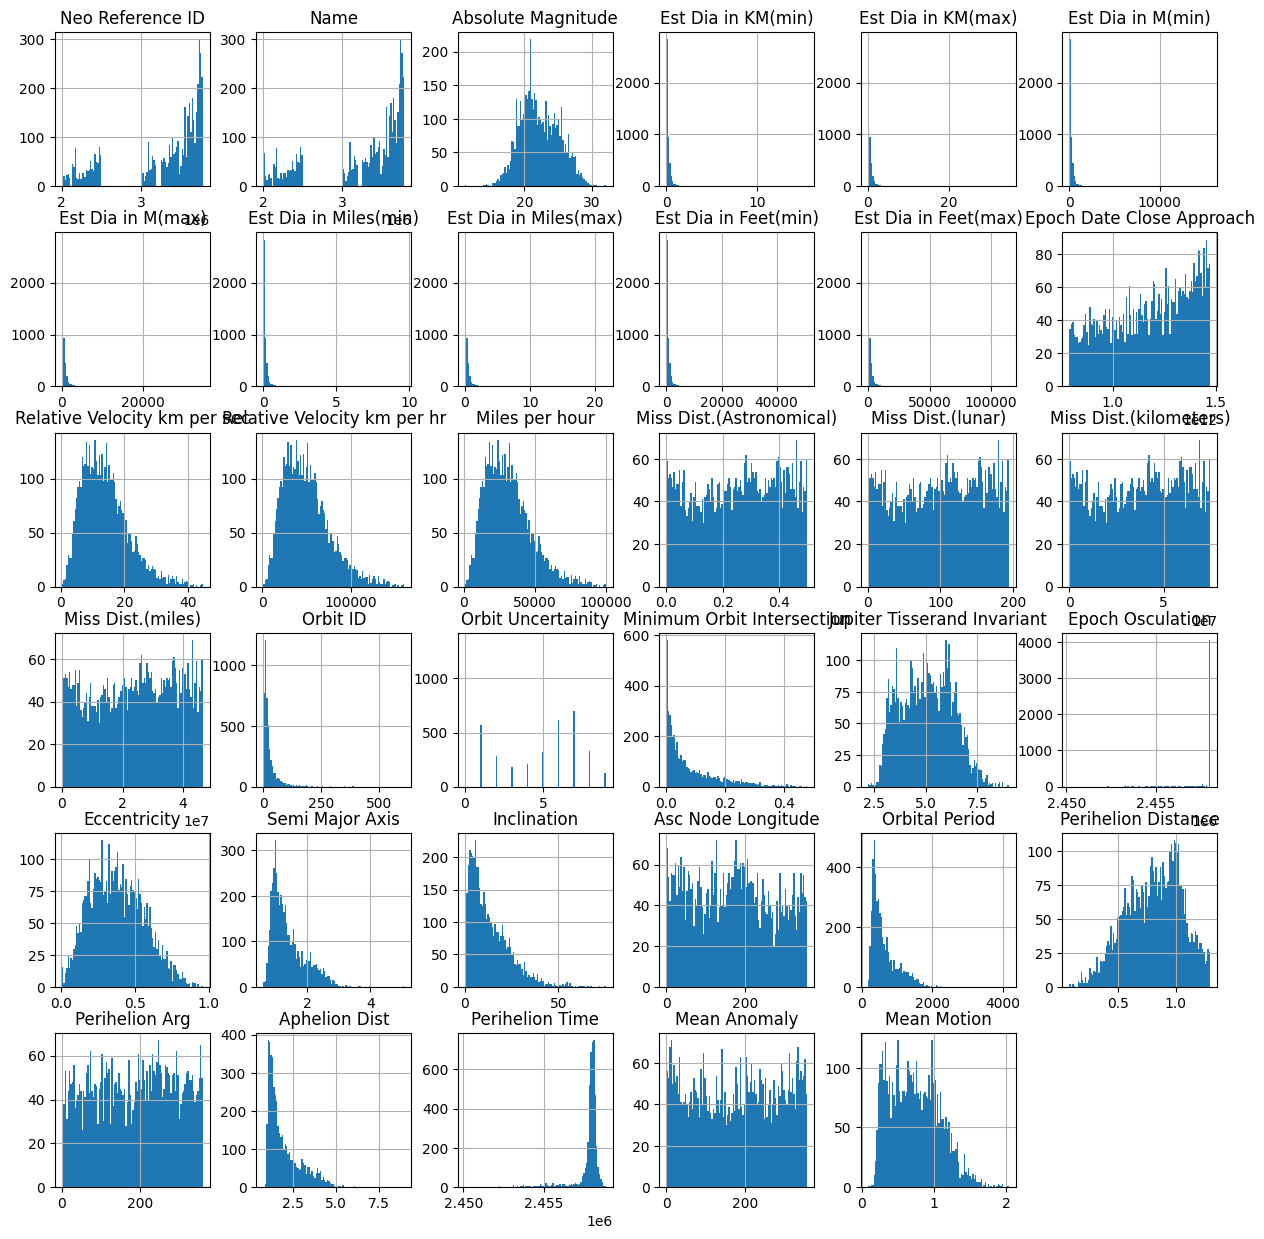

In [ ]:
dt_nasa.hist(bins = 100, figsize = (15, 15))
plt.show()

###Datos repetidos y datos nulos

In [ ]:
duplicados = dt_nasa[dt_nasa.duplicated()]
print(len(duplicados))

0


In [ ]:
dt_nasa.isnull().head()

Neo Reference ID   Name  Absolute Magnitude  Est Dia in KM(min)  \
0             False  False               False               False   
1             False  False               False               False   
2             False  False               False               False   
3             False  False               False               False   
4             False  False               False               False   

   Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \
0               False              False              False   
1               False              False              False   
2               False              False              False   
3               False              False              False   
4               False              False              False   

   Est Dia in Miles(min)  Est Dia in Miles(max)  Est Dia in Feet(min)  ...  \
0                  False                  False                 False  ...   
1                  False                  False                 False  ...   
2                  False                  False                 False  ...   
3                  False                  False                 False  ...   
4                  False                  False                 False  ...   

   Asc Node Longitude  Orbital Period  Perihelion Distance  Perihelion Arg  \
0               False           False                False           False   
1               False           False                False           False   
2               False           False                False           False   
3               False           False                False           False   
4               False           False                False           False   

   Aphelion Dist  Perihelion Time  Mean Anomaly  Mean Motion  Equinox  \
0          False            False         False        False    False   
1          False            False         False        False    False   
2          False            False         False        False    False   
3          False            False         False        False    False   
4          False            False         False        False    False   

   Hazardous  
0      False  
1      False  
2      False  
3      False  
4      False  

[5 rows x 40 columns]

In [ ]:
for col in dt_nasa.columns:
    print('Length of column'+" "+col+"=",len(dt_nasa[col]))

Length of column Neo Reference ID= 4687
Length of column Name= 4687
Length of column Absolute Magnitude= 4687
Length of column Est Dia in KM(min)= 4687
Length of column Est Dia in KM(max)= 4687
Length of column Est Dia in M(min)= 4687
Length of column Est Dia in M(max)= 4687
Length of column Est Dia in Miles(min)= 4687
Length of column Est Dia in Miles(max)= 4687
Length of column Est Dia in Feet(min)= 4687
Length of column Est Dia in Feet(max)= 4687
Length of column Close Approach Date= 4687
Length of column Epoch Date Close Approach= 4687
Length of column Relative Velocity km per sec= 4687
Length of column Relative Velocity km per hr= 4687
Length of column Miles per hour= 4687
Length of column Miss Dist.(Astronomical)= 4687
Length of column Miss Dist.(lunar)= 4687
Length of column Miss Dist.(kilometers)= 4687
Length of column Miss Dist.(miles)= 4687
Length of column Orbiting Body= 4687
Length of column Orbit ID= 4687
Length of column Orbit Determination Date= 4687
Length of column Orb

Por lo que se puede observar no hay ni datos repetidos ni nulos.

### Tratamiento de valores categoricos


Para las fechas, se utilizara el método to_datetime de pandas y convirtiendo todas las fechas en 'segundos' simplemente para hacer que las fechas sean más fáciles de normalizar. Al hacerlo, se tendran valores numéricos en esas columnas de tipo fecha en lugar de valores categóricos. Por otro lado, cuando se trata de columnas que representan variables categóricas con un número limitado de categorías únicas, como tipos de asteroides o categorías de productos, el enfoque adecuado es utilizar la codificación one-hot.

In [ ]:
### Convert categorical features to numeric ones ###

categorical_cols = ['Orbiting Body', 'Equinox']
date_cols = ['Close Approach Date', 'Orbit Determination Date']

for col in date_cols:
    dt_nasa[col] = pd.to_datetime(dt_nasa[col]).astype(int)/10**9

encoder = OneHotEncoder()
cat_encoded_np = encoder.fit_transform(dt_nasa[categorical_cols]).toarray()

cat_encoded_df = pd.DataFrame(cat_encoded_np, columns=encoder.get_feature_names_out(categorical_cols))

asteroids_cat_dropped = dt_nasa.drop(categorical_cols, axis=1)

encoded_asteroids = pd.concat([asteroids_cat_dropped, cat_encoded_df], axis=1)

In [ ]:
dt_nasa['Orbiting Body'].value_counts()

Orbiting Body
Earth    4687
Name: count, dtype: int64

In [ ]:
dt_nasa['Equinox'].value_counts()

Equinox
J2000    4687
Name: count, dtype: int64

In [ ]:
dt_nasa = dt_nasa.drop(['Equinox','Orbiting Body'], axis=1)

Se borraron los datos 'Equinox' y 'Orbiting Body Dado que sus valores eran los mismos en todos los registros.

###Reduccion de dimensionalidad

<Axes: >

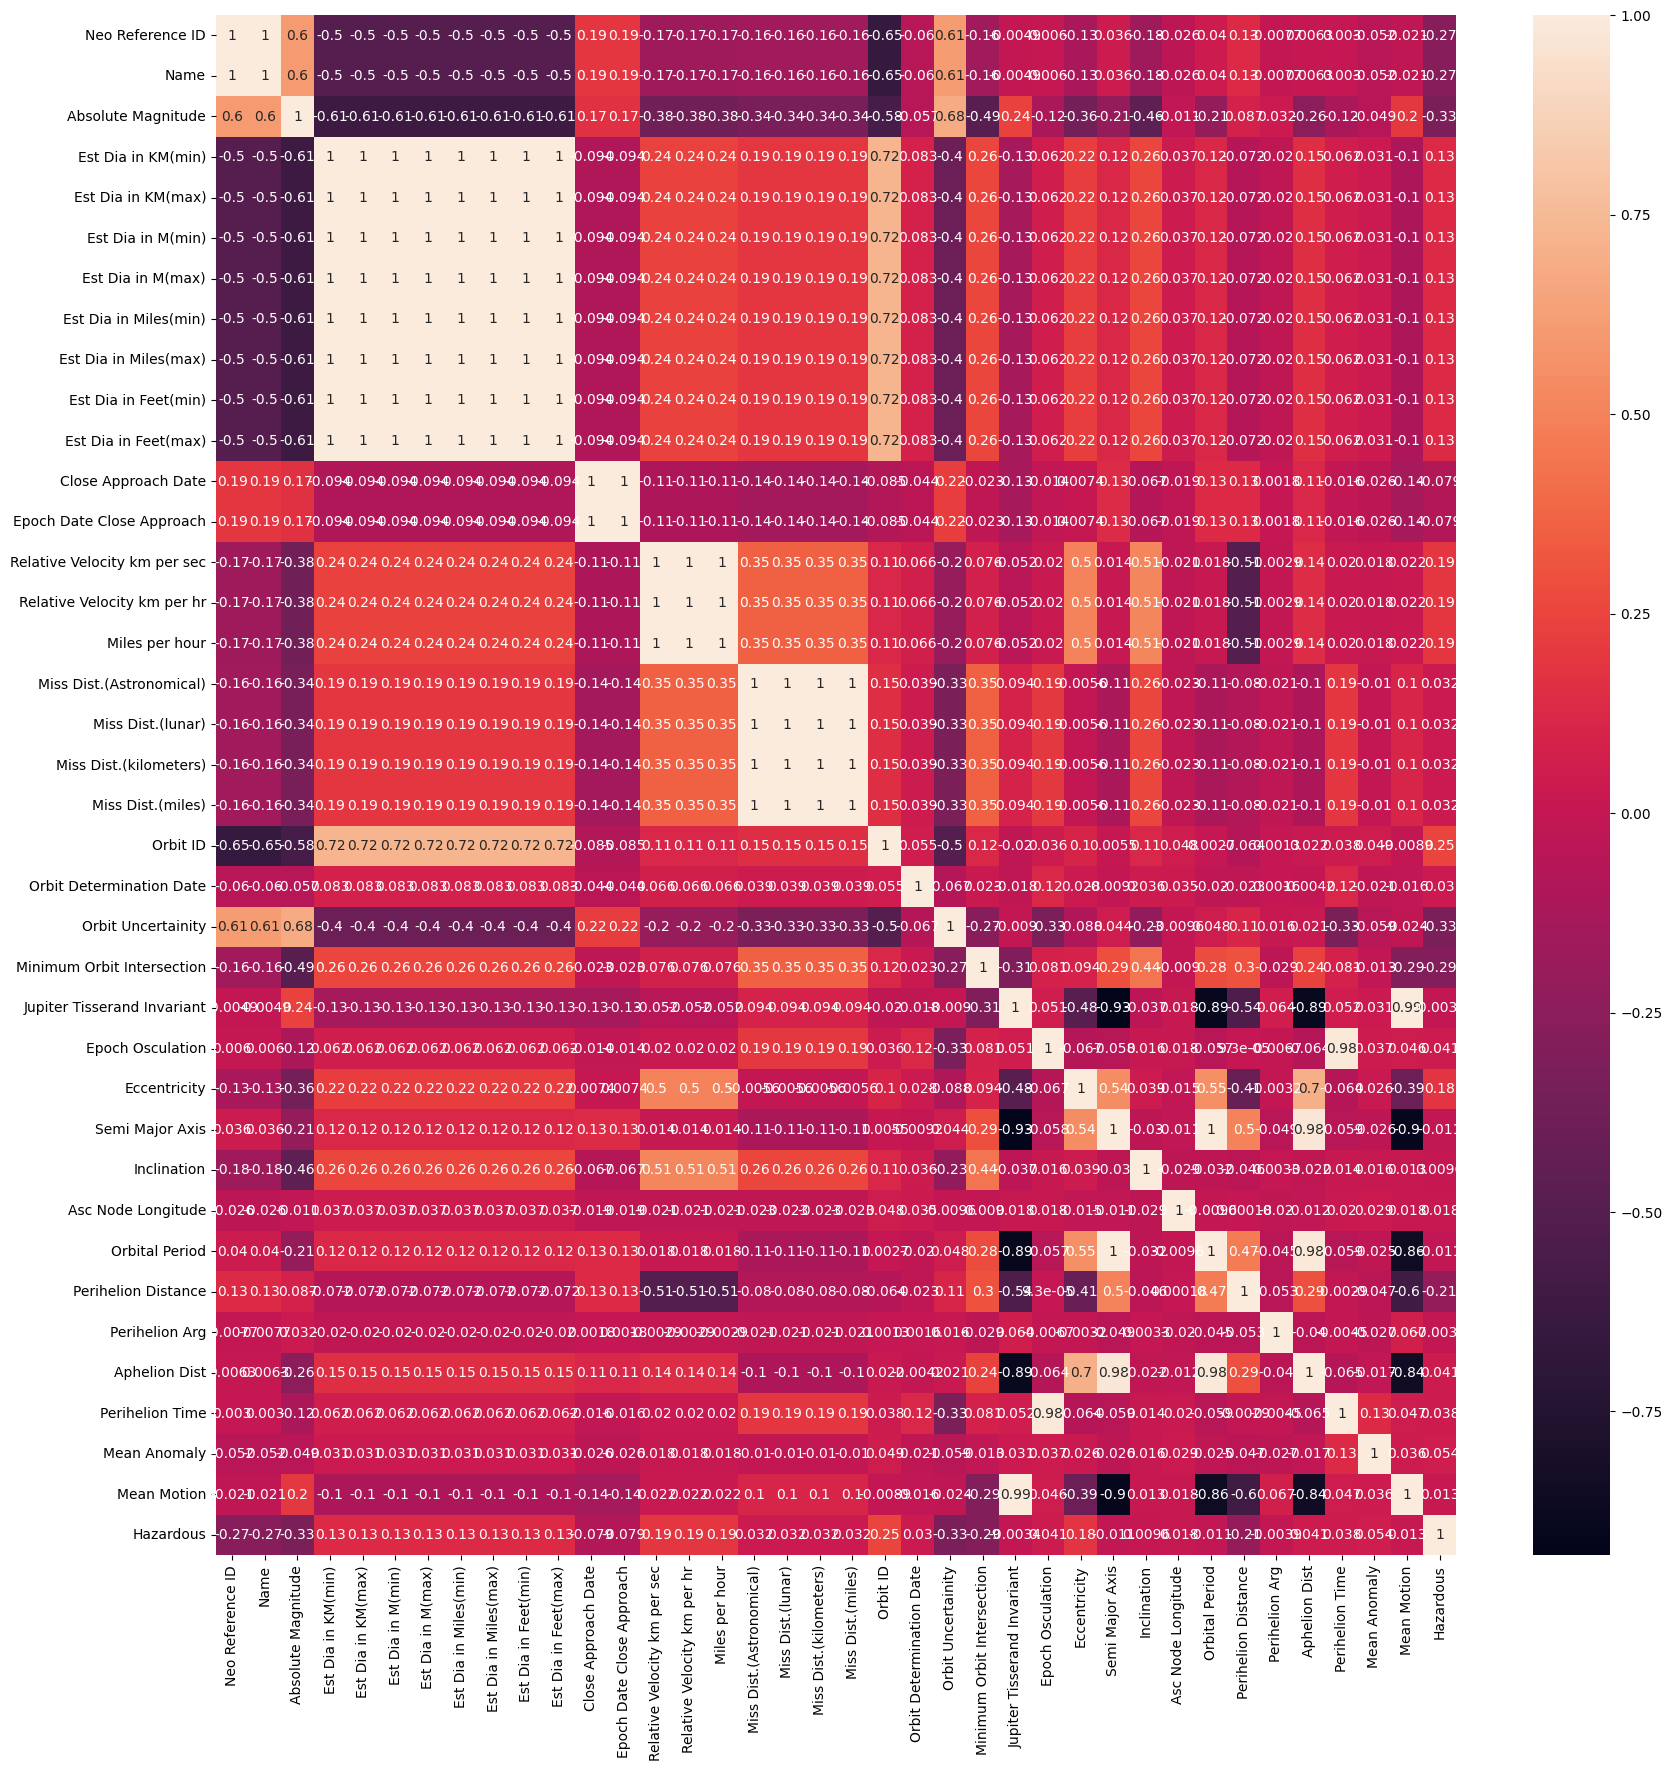

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(dt_nasa.corr(),annot =True)

Para el diámetro estimado del asteroide, se conservará 'Est Dia in KM(max)' y se eliminarán 'Est Dia in KM(min)', 'Est Dia in M(min)', 'Est Dia in Miles(min)', 'Est Dia in Feet(min)', 'Est Dia in M(max)', 'Est Dia in Miles(max)', 'Est Dia in Feet(max)'.

Para la velocidad relativa del asteroide, se conservará 'Relative Velocity km per sec' y se eliminará 'Relative Velocity km per hr'.

Para la distancia de aproximación más cercana, se conservará 'Miss Dist.(Astronomical)' y se eliminarán 'Miss Dist.(lunar)', 'Miss Dist.(kilometers)', 'Miss Dist.(miles)'.

Esta selección permite conservar la información esencial mientras se eliminan las redundancias y se simplifica el conjunto de datos para su análisis.

In [ ]:
dt_nasa =  dt_nasa.drop(['Est Dia in M(min)', 'Est Dia in Miles(min)', 'Est Dia in Feet(min)',
                       'Est Dia in M(max)', 'Est Dia in Miles(max)', 'Est Dia in Feet(max)',
                       'Relative Velocity km per hr',
                       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)','Miss Dist.(miles)'], axis=1)

dt_nasa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Close Approach Date           4687 non-null   float64
 6   Epoch Date Close Approach     4687 non-null   int64  
 7   Relative Velocity km per sec  4687 non-null   float64
 8   Miles per hour                4687 non-null   float64
 9   Miss Dist.(kilometers)        4687 non-null   float64
 10  Orbit ID                      4687 non-null   int64  
 11  Orbit Determination Date      4687 non-null   float64
 12  Orbit Uncertainity            4687 non-null   int64  
 13  Min

<Axes: >

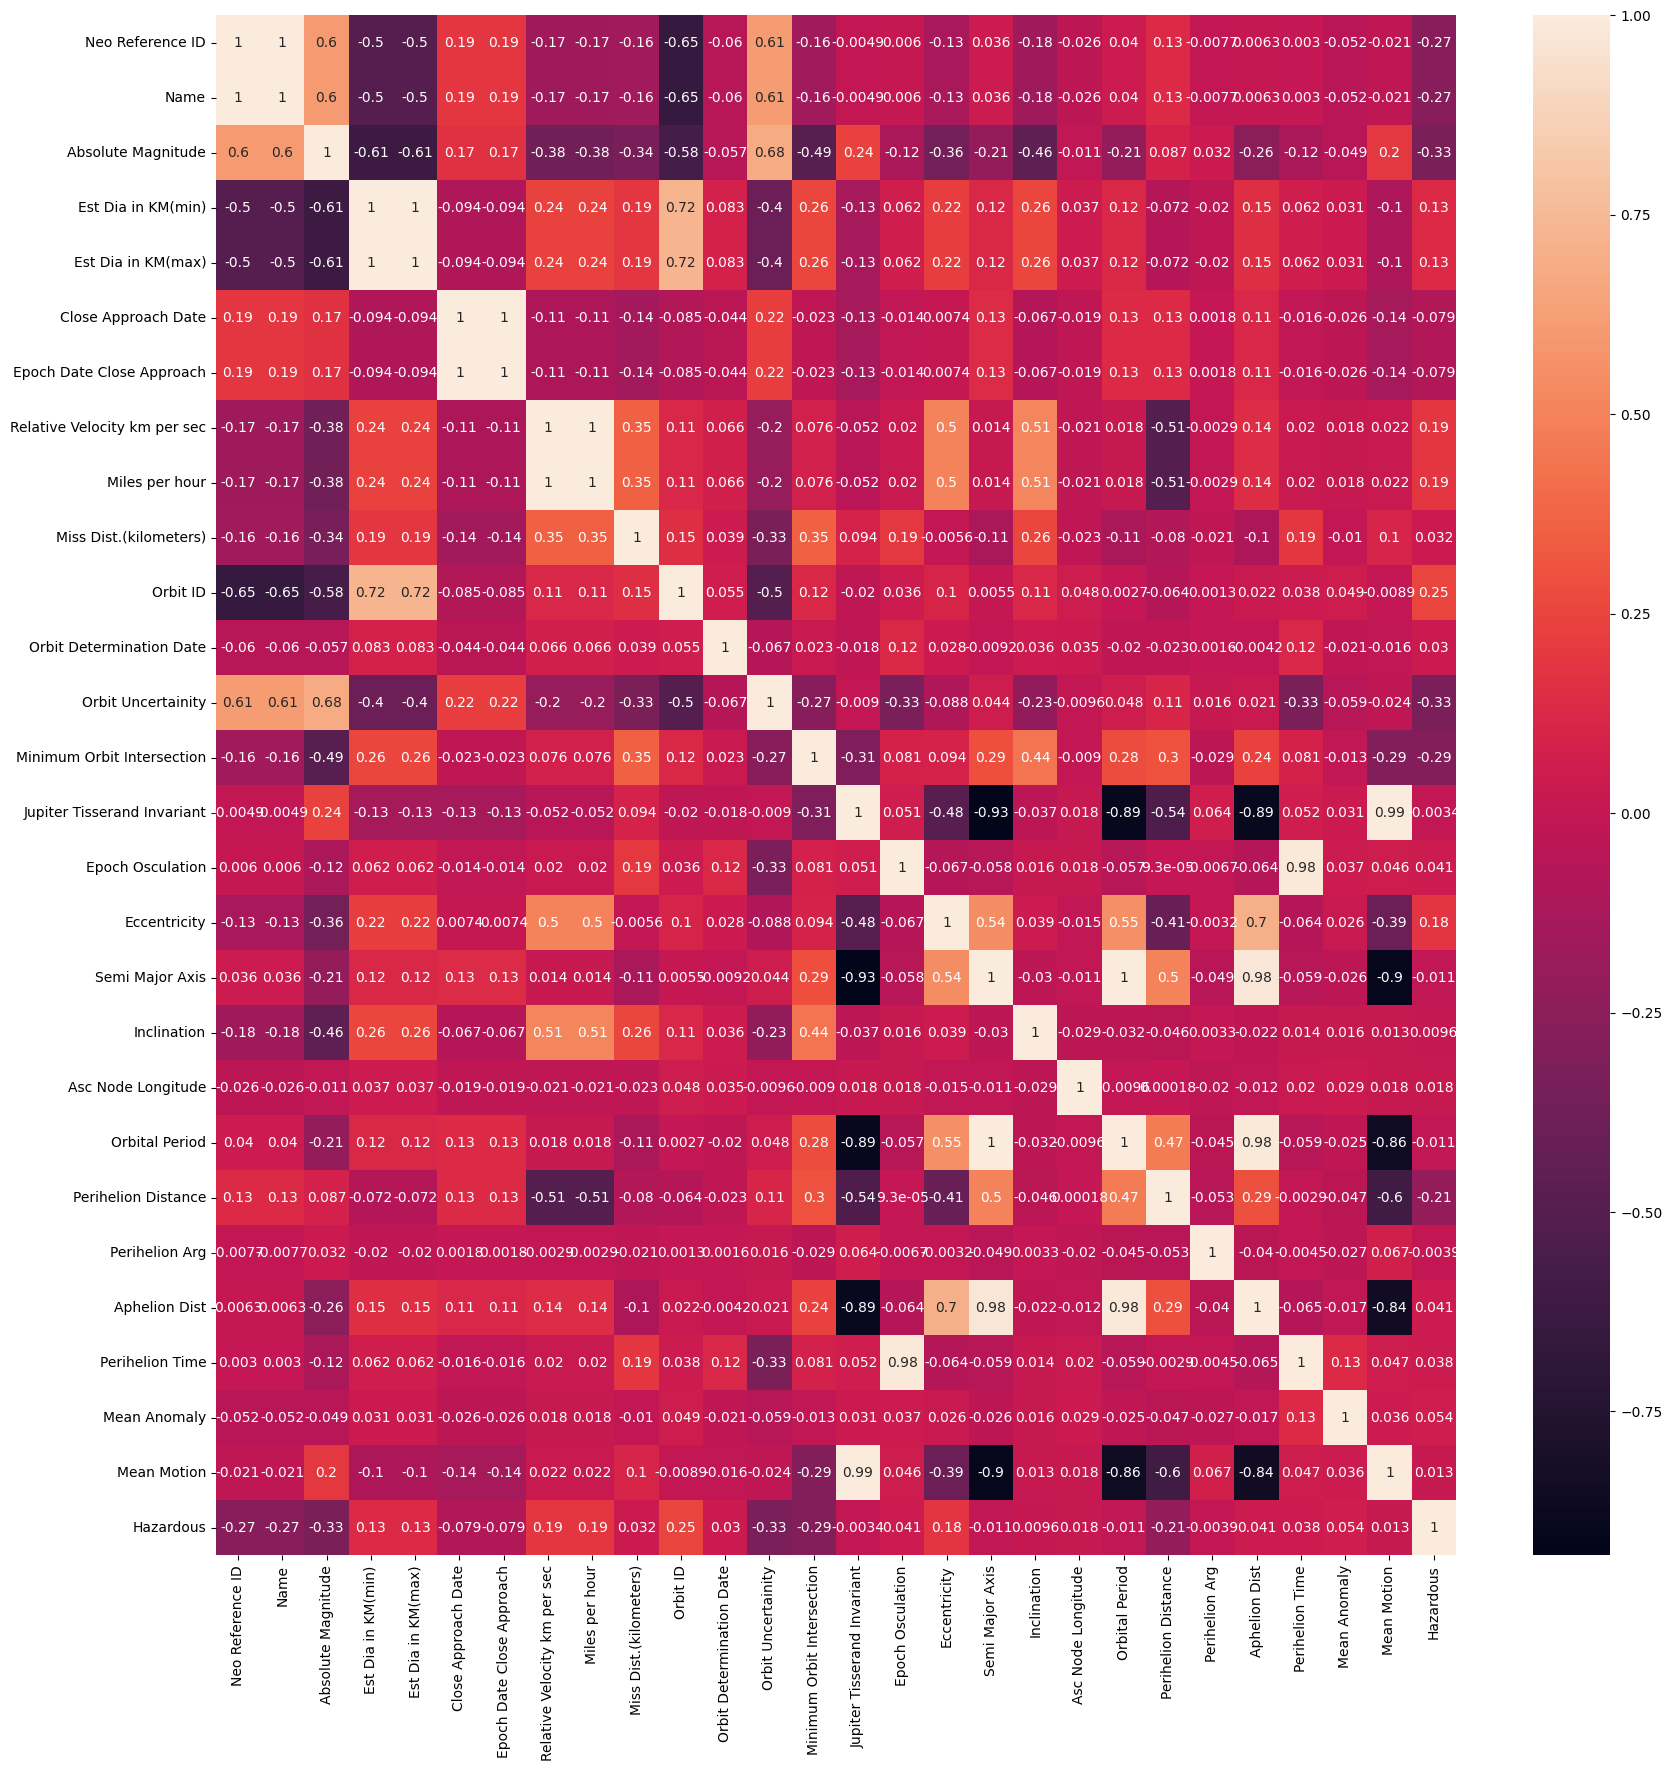

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(dt_nasa.corr(),annot =True)


A partir de la matriz de correlación, se puede observar que ciertas características como la Magnitud Absoluta, la Incertidumbre Orbital, la Intersección Mínima de Órbita, la Excentricidad y la Distancia al Perihelio tienen una correlación más fuerte con la determinación del riesgo asociado a un asteroide. Esto indica que estas características desempeñan un papel importante en la predicción del peligro potencial que representa un asteroide.


In [ ]:
nasa_cleaned = dt_nasa.drop(['Name', 'Est Dia in KM(max)', 'Epoch Date Close Approach',
                                            'Miles per hour', 'Semi Major Axis', 'Orbital Period',
                                            'Aphelion Dist', 'Perihelion Time', 'Mean Motion'], axis=1)

nasa_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Absolute Magnitude            4687 non-null   float64
 2   Est Dia in KM(min)            4687 non-null   float64
 3   Close Approach Date           4687 non-null   float64
 4   Relative Velocity km per sec  4687 non-null   float64
 5   Miss Dist.(kilometers)        4687 non-null   float64
 6   Orbit ID                      4687 non-null   int64  
 7   Orbit Determination Date      4687 non-null   float64
 8   Orbit Uncertainity            4687 non-null   int64  
 9   Minimum Orbit Intersection    4687 non-null   float64
 10  Jupiter Tisserand Invariant   4687 non-null   float64
 11  Epoch Osculation              4687 non-null   float64
 12  Eccentricity                  4687 non-null   float64
 13  Inc

###Normalizacion

In [ ]:
# Drop the label 'Hazardous' first
label = nasa_cleaned.Hazardous.values
features = nasa_cleaned.drop(['Hazardous'], axis = 1)

# Normalization
scaler = StandardScaler()
normalized_asteroids = scaler.fit_transform(features)

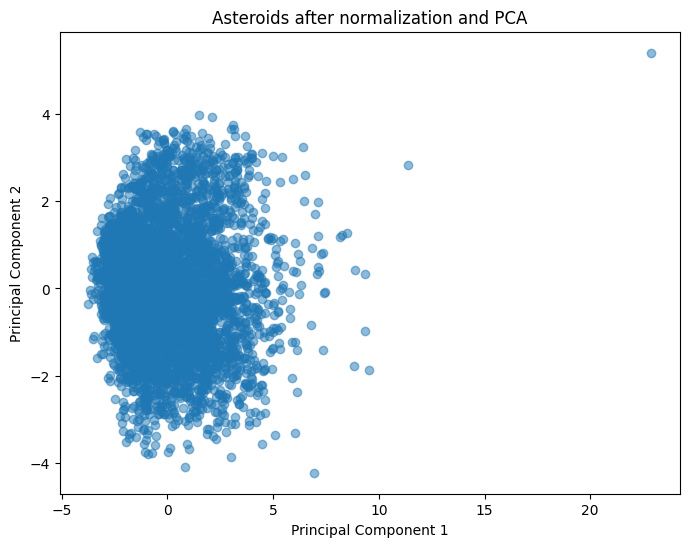

In [ ]:
from sklearn.decomposition import PCA
# Reducir dimensionalidad con PCA
pca = PCA(n_components=2)  # Reducir a dos dimensiones para visualización
normalized_asteroids_pca = pca.fit_transform(normalized_asteroids)

# Graficar los datos
plt.figure(figsize=(8, 6))
plt.scatter(normalized_asteroids_pca[:, 0], normalized_asteroids_pca[:, 1], alpha=0.5)
plt.title('Asteroids after normalization and PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
# Creating the test/train split
seed = 1234
training_features, test_features, training_label, test_label = train_test_split(features, label,
                                                                                test_size=0.8,
                                                                                stratify=label,
                                                                                random_state=seed)

In [ ]:
model = LinearRegression()
model.fit(training_features, training_label)

LinearRegression()

In [ ]:
# Realizar predicciones en el conjunto de prueba
predictions = model.predict(test_features)
print("Predicciones:\n", predictions)

Predicciones:
 [0.15304281 0.25759281 0.12615684 ... 0.131707   0.45223206 0.2281309 ]


In [ ]:
mse = mean_squared_error(test_label, predictions)
print("Error cuadrático medio en el conjunto de prueba:", mse)

Error cuadrático medio en el conjunto de prueba: 0.08788550870548775



En conclusión, el modelo de regresión lineal probado para predecir características relacionadas con asteroides muestra un rendimiento prometedor, ya que el error cuadrático medio (ECM) obtenido en el conjunto de prueba es relativamente bajo, lo que sugiere que las predicciones del modelo están cerca de los valores reales. Este resultado indica que el modelo de regresión lineal es efectivo para este conjunto de datos y puede proporcionar estimaciones útiles sobre características de asteroides como su tamaño, velocidad y distancia de aproximación.

#Consumo de Drogas

In [ ]:
load_data('https://raw.githubusercontent.com/ChiaraUsa/datasets/main/drug_consumption.csv','drug_consumption.csv')
dt_drug = pd.read_csv('/content/datasets/drug_consumption.csv')

In [ ]:
dt_drug.head()

ID      Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
0   1  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
1   2 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
2   3  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
3   4 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
4   5  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   

    Oscore   Ascore  ...  Ecstasy  Heroin  Ketamine Legalh  LSD Meth  \
0 -0.58331 -0.91699  ...      CL0     CL0       CL0    CL0  CL0  CL0   
1  1.43533  0.76096  ...      CL4     CL0       CL2    CL0  CL2  CL3   
2 -0.84732 -1.62090  ...      CL0     CL0       CL0    CL0  CL0  CL0   
3 -0.01928  0.59042  ...      CL0     CL0       CL2    CL0  CL0  CL0   
4 -0.45174 -0.30172  ...      CL1     CL0       CL0    CL1  CL0  CL0   

  Mushrooms Nicotine Semer  VSA  
0       CL0      CL2   CL0  CL0  
1       CL0      CL4   CL0  CL0  
2       CL1      CL0   CL0  CL0  
3       CL0      CL2   CL0  CL0  
4       CL2      CL2   CL0  CL0  

[5 rows x 32 columns]

In [ ]:
dt_drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

El conjunto de datos contiene información sobre varios atributos como la edad, el género, la educación, los rasgos de personalidad y los hábitos de consumo de drogas de los individuos.

El conjunto de datos tiene 1885 entradas y 32 columnas, 13 datos númericas y 19 categóricas. La mayoría de las columnas parecen ser de tipo numérico (float64), representando atributos como la edad, el género, la educación, puntajes de personalidad, etc. Sin embargo, también hay varias columnas de tipo objeto, que representan variables categóricas relacionadas con diferentes tipos de drogas y su consumo.

In [ ]:
dt_drug.describe()

ID         Age       Gender    Education      Country  \
count  1885.000000  1885.00000  1885.000000  1885.000000  1885.000000   
mean    945.294960     0.03461    -0.000256    -0.003806     0.355542   
std     545.167641     0.87836     0.482588     0.950078     0.700335   
min       1.000000    -0.95197    -0.482460    -2.435910    -0.570090   
25%     474.000000    -0.95197    -0.482460    -0.611130    -0.570090   
50%     946.000000    -0.07854    -0.482460    -0.059210     0.960820   
75%    1417.000000     0.49788     0.482460     0.454680     0.960820   
max    1888.000000     2.59171     0.482460     1.984370     0.960820   

         Ethnicity       Nscore       Escore       Oscore       Ascore  \
count  1885.000000  1885.000000  1885.000000  1885.000000  1885.000000   
mean     -0.309577     0.000047    -0.000163    -0.000534    -0.000245   
std       0.166226     0.998106     0.997448     0.996229     0.997440   
min      -1.107020    -3.464360    -3.273930    -3.273930    -3.464360   
25%      -0.316850    -0.678250    -0.695090    -0.717270    -0.606330   
50%      -0.316850     0.042570     0.003320    -0.019280    -0.017290   
75%      -0.316850     0.629670     0.637790     0.723300     0.760960   
max       1.907250     3.273930     3.273930     2.901610     3.464360   

            Cscore    Impulsive           SS  
count  1885.000000  1885.000000  1885.000000  
mean     -0.000386     0.007216    -0.003292  
std       0.997523     0.954435     0.963701  
min      -3.464360    -2.555240    -2.078480  
25%      -0.652530    -0.711260    -0.525930  
50%      -0.006650    -0.217120     0.079870  
75%       0.584890     0.529750     0.765400  
max       3.464360     2.901610     1.921730

 Los datos pueden haber sido transformados de alguna manera, ya que los valores parecen estar en una escala específica o haber sido procesados de acuerdo con alguna técnica particular.

In [ ]:
plt.rc('font', size = 12)
plt.rc('axes', labelsize = 12, titlesize = 12)
plt.rc('legend', fontsize = 14)
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)

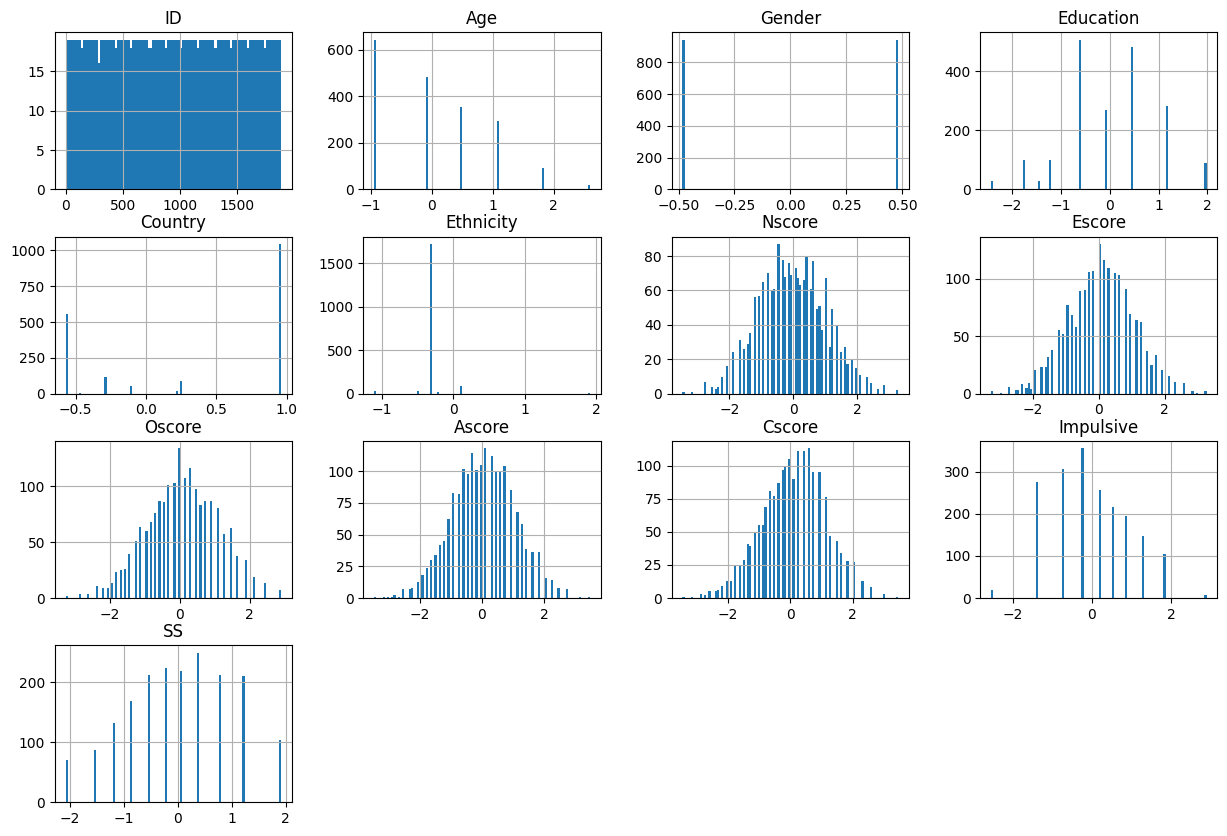

In [ ]:
dt_drug.hist(bins = 100, figsize = (15, 10))
plt.show()

In [ ]:
print("Valores nulos en el conjunto de datos de consumo de drogas:")
print(dt_drug.isnull().sum())

Valores nulos en el conjunto de datos de consumo de drogas:
ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64


No parece haber valores nulos dentro del dataset. Sin embargo, se revisará el contenido de las variables categóricas en busca de errores. Además se considera que la columna ID, es innecesaria.

In [ ]:
# Verificar valores en columnas categóricas
cat_drug = dt_drug.select_dtypes(include=['object']).columns


for column in cat_drug:
    unique_values = dt_drug[column].unique()
    print(f"Valores en {column}:", unique_values)

Valores en Alcohol: ['CL5' 'CL6' 'CL4' 'CL2' 'CL1' 'CL0' 'CL3']
Valores en Amphet: ['CL2' 'CL0' 'CL1' 'CL3' 'CL5' 'CL4' 'CL6']
Valores en Amyl: ['CL0' 'CL2' 'CL1' 'CL3' 'CL5' 'CL4' 'CL6']
Valores en Benzos: ['CL2' 'CL0' 'CL3' 'CL1' 'CL4' 'CL5' 'CL6']
Valores en Caff: ['CL6' 'CL5' 'CL4' 'CL3' 'CL0' 'CL1' 'CL2']
Valores en Cannabis: ['CL0' 'CL4' 'CL3' 'CL2' 'CL1' 'CL6' 'CL5']
Valores en Choc: ['CL5' 'CL6' 'CL4' 'CL0' 'CL3' 'CL2' 'CL1']
Valores en Coke: ['CL0' 'CL3' 'CL2' 'CL1' 'CL6' 'CL5' 'CL4']
Valores en Crack: ['CL0' 'CL1' 'CL2' 'CL3' 'CL5' 'CL4' 'CL6']
Valores en Ecstasy: ['CL0' 'CL4' 'CL1' 'CL3' 'CL2' 'CL6' 'CL5']
Valores en Heroin: ['CL0' 'CL1' 'CL2' 'CL3' 'CL5' 'CL6' 'CL4']
Valores en Ketamine: ['CL0' 'CL2' 'CL3' 'CL1' 'CL5' 'CL4' 'CL6']
Valores en Legalh: ['CL0' 'CL1' 'CL2' 'CL3' 'CL5' 'CL4' 'CL6']
Valores en LSD: ['CL0' 'CL2' 'CL1' 'CL3' 'CL4' 'CL5' 'CL6']
Valores en Meth: ['CL0' 'CL3' 'CL1' 'CL6' 'CL4' 'CL2' 'CL5']
Valores en Mushrooms: ['CL0' 'CL1' 'CL2' 'CL3' 'CL4' 'CL5' 'CL6

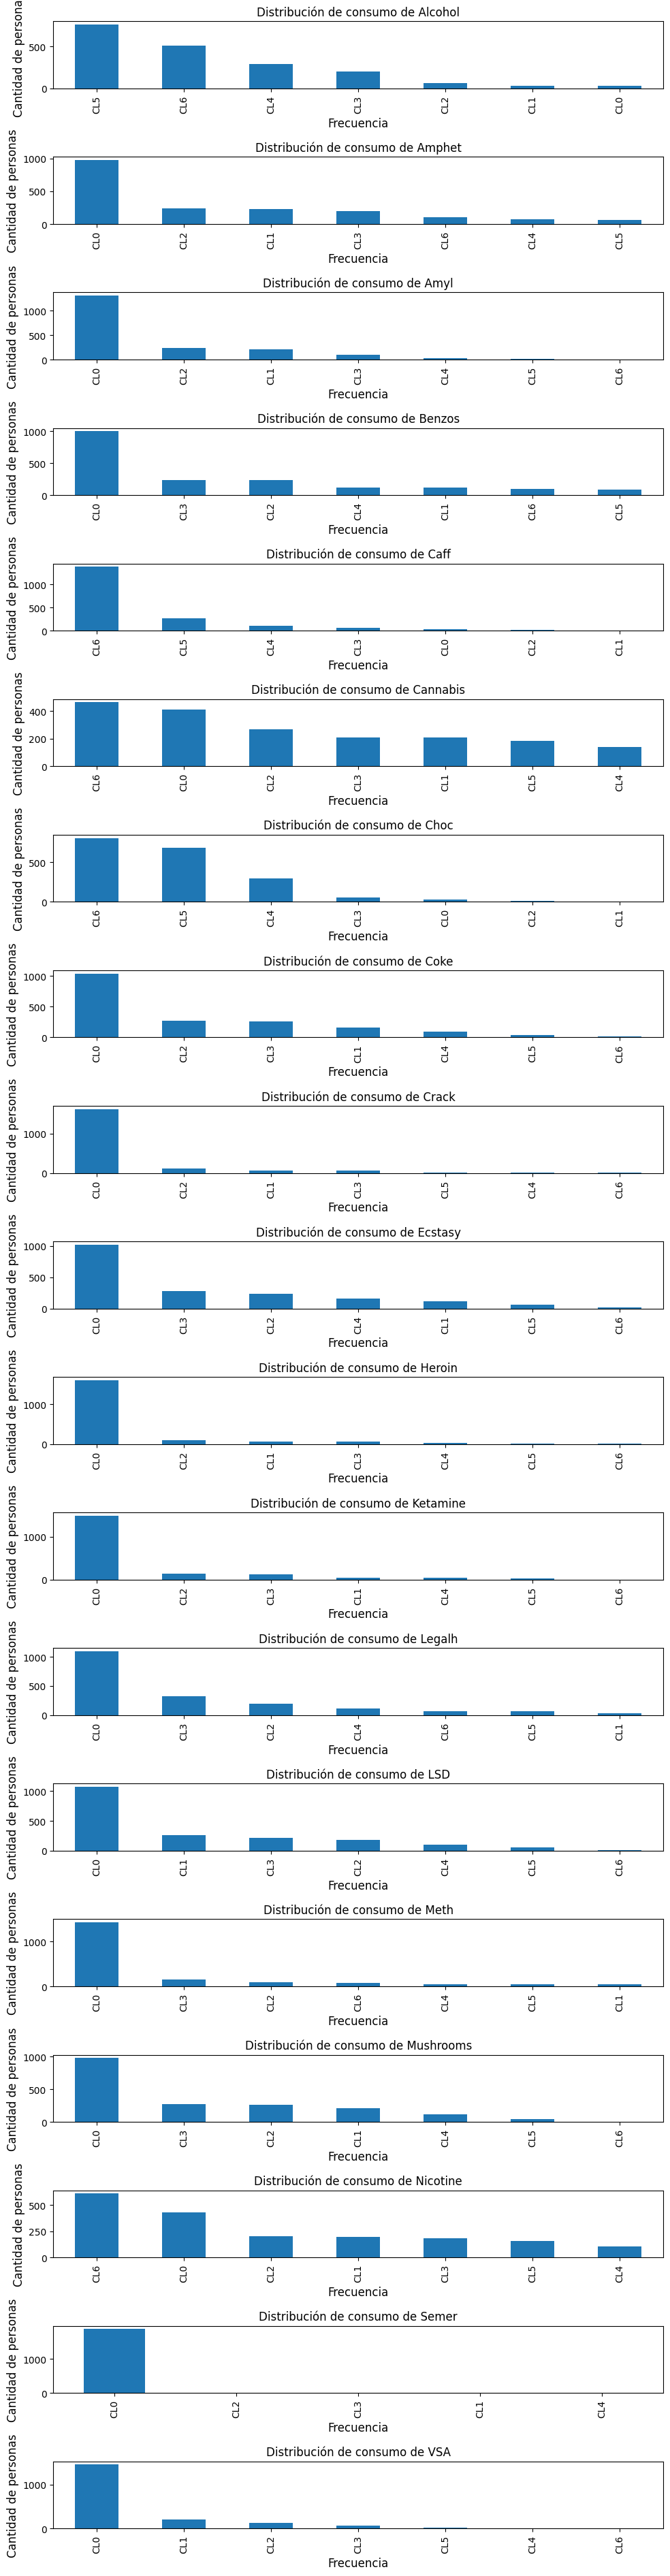

In [ ]:
num_drugs = len(cat_drug)
fig, axs = plt.subplots(num_drugs, 1, figsize=(10, 2*num_drugs))

for i, drug in enumerate(cat_drug):
    dt_drug[drug].value_counts().plot(kind='bar', ax=axs[i])
    axs[i].set_title(f'Distribución de consumo de {drug}')
    axs[i].set_xlabel('Frecuencia')
    axs[i].set_ylabel('Cantidad de personas')

plt.tight_layout()
plt.show()

No se ven errores en las columnas categóricas. Ahora se eliminará la columna ID, y convertirán las columnas categóricas en númericas.

In [ ]:
dt_drug.drop('ID', axis=1, inplace=True)

In [ ]:
ordinal_encoder = OrdinalEncoder()

encoded_features = ordinal_encoder.fit_transform(dt_drug[cat_drug])
dt_drug_encoded = pd.DataFrame(encoded_features, columns=cat_drug)

In [ ]:
dt_drug_encoded.head()

Alcohol  Amphet  Amyl  Benzos  Caff  Cannabis  Choc  Coke  Crack  Ecstasy  \
0      5.0     2.0   0.0     2.0   6.0       0.0   5.0   0.0    0.0      0.0   
1      5.0     2.0   2.0     0.0   6.0       4.0   6.0   3.0    0.0      4.0   
2      6.0     0.0   0.0     0.0   6.0       3.0   4.0   0.0    0.0      0.0   
3      4.0     0.0   0.0     3.0   5.0       2.0   4.0   2.0    0.0      0.0   
4      4.0     1.0   1.0     0.0   6.0       3.0   6.0   0.0    0.0      1.0   

   Heroin  Ketamine  Legalh  LSD  Meth  Mushrooms  Nicotine  Semer  VSA  
0     0.0       0.0     0.0  0.0   0.0        0.0       2.0    0.0  0.0  
1     0.0       2.0     0.0  2.0   3.0        0.0       4.0    0.0  0.0  
2     0.0       0.0     0.0  0.0   0.0        1.0       0.0    0.0  0.0  
3     0.0       2.0     0.0  0.0   0.0        0.0       2.0    0.0  0.0  
4     0.0       0.0     1.0  0.0   0.0        2.0       2.0    0.0  0.0

In [ ]:
ordinal_encoder.categories_

[array(['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'], dtype=object),
 array(['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'], dtype=object),
 array(['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'], dtype=object),
 array(['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'], dtype=object),
 array(['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'], dtype=object),
 array(['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'], dtype=object),
 array(['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'], dtype=object),
 array(['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'], dtype=object),
 array(['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'], dtype=object),
 array(['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'], dtype=object),
 array(['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'], dtype=object),
 array(['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'], dtype=object),
 array(['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'], dtype=object),
 array(['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', '

Se eligió la codificación ordinal en lugar de la codificación one-hot para las variables categóricas relacionadas con las drogas debido a la naturaleza de los datos y la estructura del problema. Ya que el uso de OrdinalEncoder permite convertir las categorías en números enteros ordenados.  Esto es útil dado el orden implícito y jerárquico en el contenido de las columnas de tipos de drogas.

En este caso, las variables categóricas se han convertido en números enteros. Que además respresentan de manera adecuada la escala incial. Siendo CL0 = 0, CL1 = 1, y así sucesivamente.

Ahora, se unirán los dos datasets, para obtener uno solo númerico.

In [ ]:
for column in dt_drug_encoded.columns:
    dt_drug[column] = dt_drug_encoded[column]

dt_drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1885 non-null   float64
 1   Gender     1885 non-null   float64
 2   Education  1885 non-null   float64
 3   Country    1885 non-null   float64
 4   Ethnicity  1885 non-null   float64
 5   Nscore     1885 non-null   float64
 6   Escore     1885 non-null   float64
 7   Oscore     1885 non-null   float64
 8   Ascore     1885 non-null   float64
 9   Cscore     1885 non-null   float64
 10  Impulsive  1885 non-null   float64
 11  SS         1885 non-null   float64
 12  Alcohol    1885 non-null   float64
 13  Amphet     1885 non-null   float64
 14  Amyl       1885 non-null   float64
 15  Benzos     1885 non-null   float64
 16  Caff       1885 non-null   float64
 17  Cannabis   1885 non-null   float64
 18  Choc       1885 non-null   float64
 19  Coke       1885 non-null   float64
 20  Crack   

In [ ]:
# Se eliminan las filas duplicadas en caso de que hallan
duplicate_rows = dt_drug[dt_drug.duplicated()]
dt_drug = dt_drug.drop_duplicates()
print("cantidad de filas duplicadas: ",len(duplicate_rows))

cantidad de filas duplicadas:  0


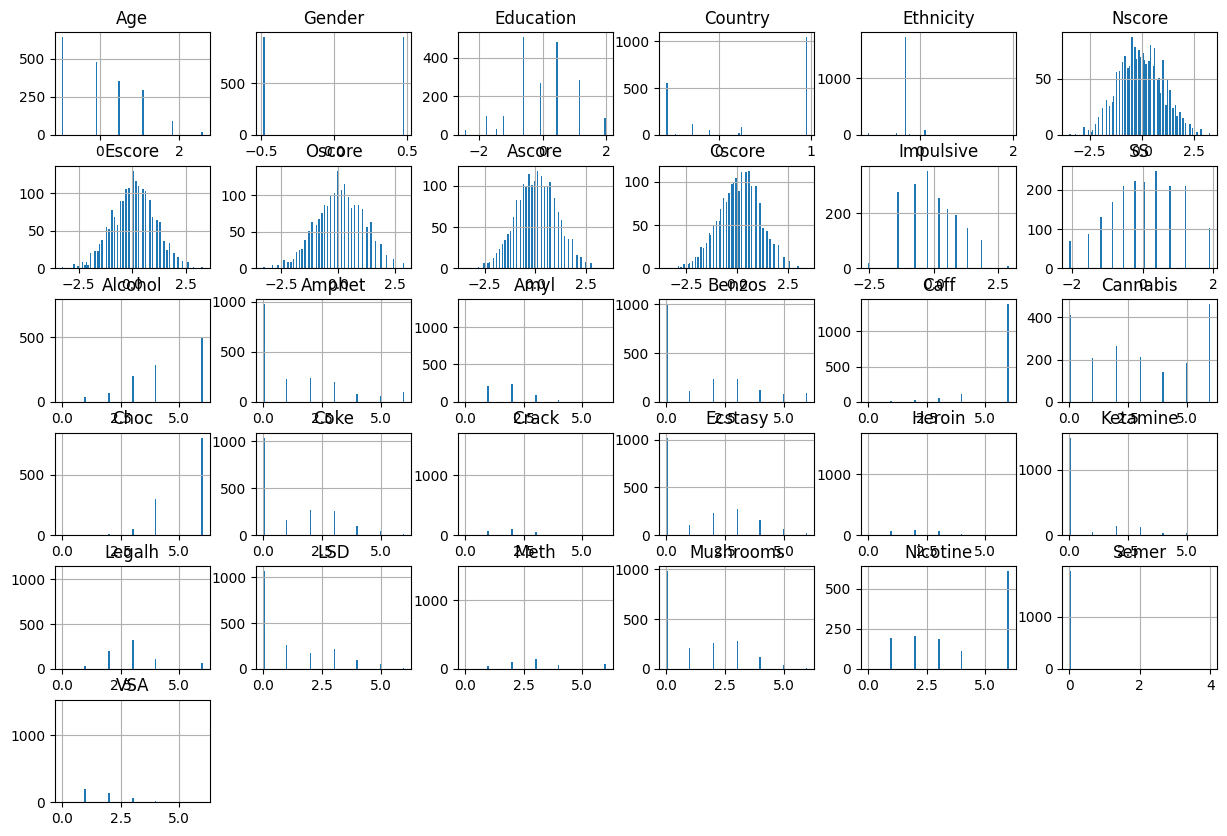

In [ ]:
dt_drug.hist(bins = 100, figsize = (15, 10))
plt.show()

Ya que los datos están normalizados con la Normalización Min-Max y Estandarización, que transforma los datos al rango especificado (en este caso, [-1, 1]). No se repetirá el proceso.

Se procederá a buscar correlaciones entre los valores de las variables.

In [ ]:
corr_ma = dt_drug.corr(numeric_only=True)
corr_ma

Age    Gender  Education   Country  Ethnicity    Nscore  \
Age        1.000000  0.110286   0.158811  0.354241  -0.069753 -0.136654   
Gender     0.110286  1.000000   0.196774  0.216271  -0.001213  0.074646   
Education  0.158811  0.196774   1.000000  0.225311  -0.036099 -0.100993   
Country    0.354241  0.216271   0.225311  1.000000  -0.127946 -0.136191   
Ethnicity -0.069753 -0.001213  -0.036099 -0.127946   1.000000  0.047642   
Nscore    -0.136654  0.074646  -0.100993 -0.136191   0.047642  1.000000   
Escore    -0.033849  0.057864   0.115645  0.109524   0.018402 -0.431051   
Oscore    -0.226778 -0.131021   0.057994 -0.341969   0.084816  0.010177   
Ascore     0.063504  0.219743   0.091088  0.150921  -0.038726 -0.216964   
Cscore     0.183564  0.183831   0.240417  0.214000  -0.029923 -0.391088   
Impulsive -0.190939 -0.167492  -0.132482 -0.231572   0.082411  0.174399   
SS        -0.332188 -0.244277  -0.131146 -0.345415   0.100304  0.079988   
Alcohol   -0.028773 -0.002537   0.130657  0.076361   0.053825 -0.001882   
Amphet    -0.246748 -0.222440  -0.153895 -0.395836   0.084407  0.131120   
Amyl      -0.098108 -0.162250  -0.002560  0.080596   0.038790  0.033317   
Benzos    -0.126416 -0.133717  -0.133038 -0.401114   0.118517  0.272221   
Caff       0.037413 -0.011195   0.036019  0.004974   0.084292  0.013032   
Cannabis  -0.446846 -0.301579  -0.265405 -0.551938   0.136049  0.095535   
Choc       0.047522  0.074584   0.027837  0.124505   0.024475  0.012583   
Coke      -0.220664 -0.176704  -0.108433 -0.277531   0.086853  0.139915   
Crack     -0.051355 -0.151324  -0.147743 -0.229899   0.035478  0.111435   
Ecstasy   -0.384784 -0.228574  -0.159819 -0.336328   0.071826  0.069948   
Heroin    -0.121675 -0.136728  -0.131051 -0.300210   0.042881  0.172685   
Ketamine  -0.220689 -0.189825  -0.076479 -0.112577   0.031961  0.062750   
Legalh    -0.419839 -0.315676  -0.208656 -0.426030   0.077511  0.113342   
LSD       -0.323207 -0.278983  -0.177817 -0.498263   0.129031  0.037095   
Meth      -0.191503 -0.181489  -0.170103 -0.413946   0.063805  0.184672   
Mushrooms -0.331456 -0.272431  -0.169762 -0.490052   0.115962  0.042386   
Nicotine  -0.248883 -0.192084  -0.240547 -0.277913   0.077724  0.128430   
Semer     -0.049729  0.013354  -0.036342 -0.068018   0.022716 -0.001673   
VSA       -0.229657 -0.134852  -0.120540 -0.267033   0.087011  0.115086   

             Escore    Oscore    Ascore    Cscore  ...   Ecstasy    Heroin  \
Age       -0.033849 -0.226778  0.063504  0.183564  ... -0.384784 -0.121675   
Gender     0.057864 -0.131021  0.219743  0.183831  ... -0.228574 -0.136728   
Education  0.115645  0.057994  0.091088  0.240417  ... -0.159819 -0.131051   
Country    0.109524 -0.341969  0.150921  0.214000  ... -0.336328 -0.300210   
Ethnicity  0.018402  0.084816 -0.038726 -0.029923  ...  0.071826  0.042881   
Nscore    -0.431051  0.010177 -0.216964 -0.391088  ...  0.069948  0.172685   
Escore     1.000000  0.245277  0.157336  0.308024  ...  0.078822 -0.079998   
Oscore     0.245277  1.000000  0.038516 -0.056811  ...  0.296306  0.134194   
Ascore     0.157336  0.038516  1.000000  0.247482  ... -0.114550 -0.169886   
Cscore     0.308024 -0.056811  0.247482  1.000000  ... -0.217335 -0.158398   
Impulsive  0.114151  0.277512 -0.229690 -0.335133  ...  0.260864  0.197701   
SS         0.210130  0.421709 -0.208061 -0.229038  ...  0.388186  0.213684   
Alcohol    0.092303  0.032711 -0.021806 -0.000203  ...  0.073585 -0.033786   
Amphet    -0.041095  0.221116 -0.148868 -0.236235  ...  0.521537  0.360896   
Amyl       0.030199  0.060511 -0.096057 -0.117803  ...  0.358947  0.129242   
Benzos    -0.103442  0.201334 -0.164512 -0.206383  ...  0.342400  0.427162   
Caff       0.054343  0.027304 -0.016190 -0.027744  ...  0.033983  0.014683   
Cannabis  -0.014369  0.414163 -0.148481 -0.274780  ...  0.552978  0.233546   
Choc       0.020305  0.001239  0.036266  0.000357  ... -0.049131 -0.078250   
Coke       0.030942  0.188276 -0.198147 -0.195228  ... 

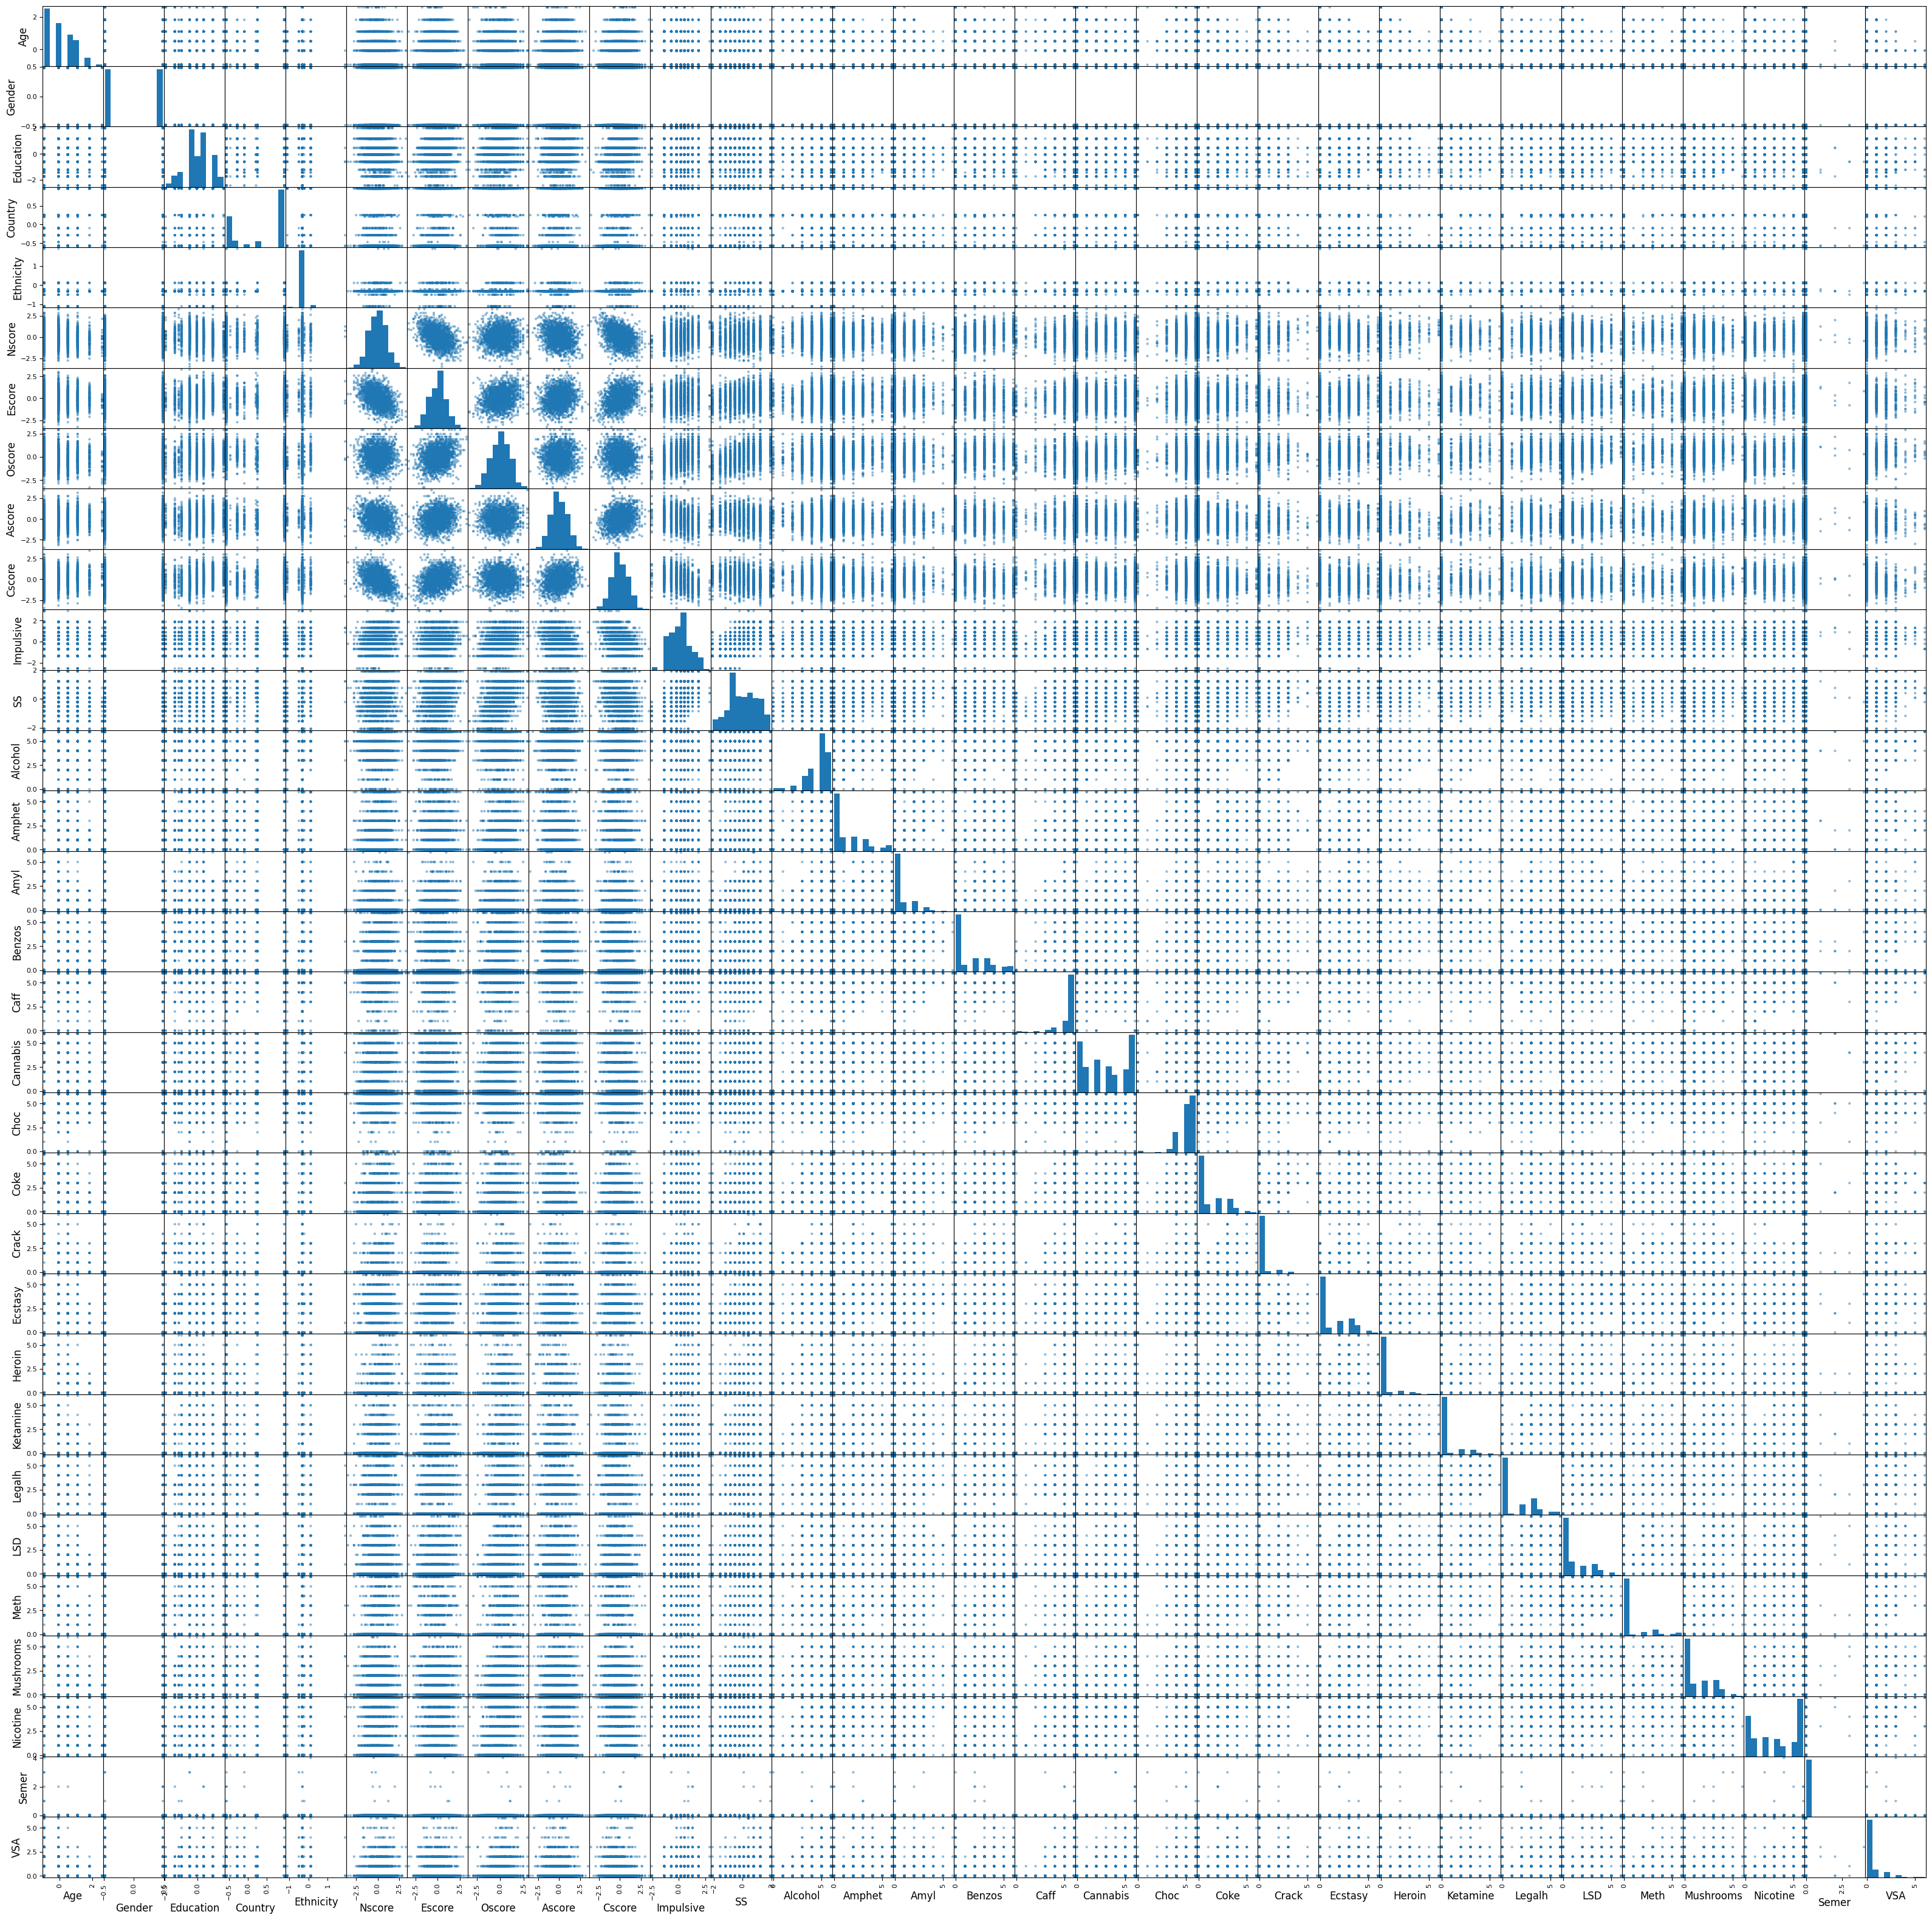

In [ ]:
scatter_matrix(dt_drug, figsize=(40,40))
plt.show()

Dado que el gráfico no es conclusivo, se seleccionarán las columnas con mayor correlación.

In [ ]:
sorted_corr = corr_ma.abs().unstack().sort_values(ascending=False)

top_correlations = sorted_corr[sorted_corr < 1].head(10)

print("Variables con mayor correlación:")
print(top_correlations)

Variables con mayor correlación:
LSD        Mushrooms    0.668627
Mushrooms  LSD          0.668627
Impulsive  SS           0.623120
SS         Impulsive    0.623120
Coke       Ecstasy      0.610783
Ecstasy    Coke         0.610783
Cannabis   Mushrooms    0.579934
Mushrooms  Cannabis     0.579934
Ecstasy    LSD          0.570946
LSD        Ecstasy      0.570946
dtype: float64


 Aquí hay algunas posibles interpretaciones de las correlaciones son:

1. Relaciones de consumo: Las correlaciones positivas entre el LSD y Mushrooms, Coke y Ecstasy, y Cannabis y Mushrooms podrían sugerir que las personas que consumen una droga también tienen una mayor probabilidad de consumir la otra. Esto podría reflejar patrones de comportamiento de consumo de sustancias similares entre los encuestados.

2. Factores subyacentes: La correlación entre Impulsive y SS podría indicar una relación entre la impulsividad y la búsqueda de sensaciones, lo que a su vez podría estar asociado con un mayor consumo de drogas.


In [ ]:
interes = ['Age', 'Gender', 'Education',  'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']

drugs = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis',
                    'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine',
                    'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']

# Filtrar la matriz de correlación por las variables de interés y drogas
corr_matrix_interes = corr_ma[drugs].loc[interes]

# Ordenar las correlaciones por valor absoluto en orden descendente
sorted_corr_interes = corr_matrix_interes.abs().unstack().sort_values(ascending=False)

# Seleccionar las correlaciones más altas (excluyendo la diagonal principal)
top_correlations_interes = sorted_corr_interes[sorted_corr_interes < 1].head(10)

print("Variables de drogas con mayor correlación con las variables de interés:")
print(top_correlations_interes)

Variables de drogas con mayor correlación con las variables de interés:
Cannabis   SS        0.456137
           Age       0.446846
Legalh     Age       0.419839
Cannabis   Oscore    0.414163
Legalh     SS        0.405578
Ecstasy    SS        0.388186
           Age       0.384784
Mushrooms  SS        0.378285
LSD        Oscore    0.369759
Mushrooms  Oscore    0.369139
dtype: float64


- Cannabis - SS (0.456137): Existe una correlación positiva moderada entre el consumo de cannabis y la puntuación en la escala de búsqueda de sensaciones (SS). Esto sugiere que las personas que tienen una mayor tendencia a buscar sensaciones también tienden a consumir cannabis con más frecuencia.

- Cannabis - Age (0.446846) y Legalh - Age (0.419839): Hay una correlación positiva moderada entre el consumo de cannabis y la edad y  entre Legalh y la edad. Esto podría indicar que el consumo de cannabis tiende a ser más alto en ciertos grupos de edad.

- Cannabis - Oscore (0.414163): Hay una correlación positiva moderada entre el consumo de cannabis y la puntuación en la dimensión de apertura a la experiencia (Oscore). Esto sugiere que las personas con una mayor apertura a nuevas experiencias tienden a consumir cannabis con más frecuencia.

- Legalh - SS (0.405578): Existe una correlación positiva moderada entre el consumo de Legalh y la puntuación en la escala de búsqueda de sensaciones (SS). Esto sugiere que las personas que tienen una mayor tendencia a buscar sensaciones también tienden a consumir Legalh con más frecuencia.

Se implementa el modelo bajo la premisa de que la varible objetivo es una de las drogas.

In [ ]:
def shuffle_and_split(data, test_ratio):
    shuffle_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffle_indices[:test_set_size]
    train_indices = shuffle_indices[test_set_size:]

    return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
drug_train, drug_test = shuffle_and_split(dt_drug, 0.3)

In [ ]:
# Seleccionar características y variable objetivo
features = ['Age', 'Gender', 'Education', 'Country', 'Nscore',
            'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
target = 'Cannabis'

# Dividir los datos en características (X) y variable objetivo (y)
X_train, y_train = drug_train[features], drug_train[target]
X_test, y_test = drug_test[features], drug_test[target]

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred = model.predict(X_test)
pred

array([ 1.72999938,  5.10517087,  4.07940799,  2.81801488,  4.84470424,
        4.51142455,  0.65033327,  4.01586887,  3.82402026,  4.19174767,
        5.23155519,  3.38179019,  1.68360943,  3.12861551,  4.00674439,
        3.38780811,  1.52736337,  0.327675  ,  0.8556397 ,  4.30756313,
        2.28729662,  2.26065682,  2.49810729,  2.1138266 ,  3.46210026,
        1.23369765,  5.72794079,  2.18450867,  4.23480413,  2.01530586,
        3.86938679,  3.69502661,  0.94450486,  3.03535476,  2.55487496,
        5.36463103,  4.57133567,  1.3823477 ,  3.88275666,  5.01767608,
        3.97737362,  3.81151911,  3.05490278,  4.22598587,  4.00203635,
        4.55203424,  4.576235  ,  1.17515701,  1.7015469 ,  3.82012197,
        1.70678125,  1.25520803,  1.74752904,  2.46245115,  1.38537592,
        0.30049987,  0.6310006 ,  1.66333335,  1.39173306,  3.72137585,
        3.0022751 ,  5.7331249 ,  2.91868057,  4.52728812,  1.31510221,
        6.39020458,  1.11250684,  4.44913908,  1.13067215,  3.68

Se implementará el MSE con el fin de concluir adecuadamente sobre el modelo

In [ ]:
mse = mean_squared_error(y_test, pred)
print("Error cuadrático medio en el conjunto de prueba:", mse)

Error cuadrático medio en el conjunto de prueba: 2.5923859675276275


El modelo de regresión lineal se utilizó para predecir el consumo de cannabis (variable objetivo) utilizando características como la edad, género, educación, país, puntajes en diferentes dimensiones de personalidad (Nscore, Escore, Oscore, Ascore, Cscore), impulsividad e impulsividad de búsqueda de sensaciones (SS).

Para evaluar el rendimiento del modelo, se calculó el Error Cuadrático Medio (MSE, por sus siglas en inglés) en el conjunto de prueba. En este caso, el MSE calculado es aproximadamente 2.4692, lo que sugiere que el modelo tiene un error cuadrático medio de alrededor de 2.47 en el conjunto de prueba. Esto significa que, el modelo podría predecir de manera moderada el consumo de cannabis.

#Fraude Tarjetas de Crédito

> Este conjunto de datos ofrece una variedad de atributos valiosos para un análisis completo. Contiene 555,719 instancias y 22 atributos, una mezcla de tipos de datos categóricos y numéricos. Importante destacar que el conjunto de datos está completo y no tiene valores nulos.

In [ ]:
    load_data('https://raw.githubusercontent.com/ChiaraUsa/datasets/main/kaggle.json','kaggle.json')

In [ ]:
!pip install -q kaggle
!mkdir -p /root/.kaggle
!cp /content/datasets/kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d kelvinkelue/credit-card-fraud-prediction
!unzip credit-card-fraud-prediction.zip
!mv "fraud test.csv" "fraud-test.csv"

credit-card-fraud-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  credit-card-fraud-prediction.zip
  inflating: fraud test.csv          


In [ ]:
dt_fraud = pd.read_csv('/content/fraud-test.csv')

In [ ]:
dt_fraud.head()

Unnamed: 0 trans_date_trans_time        cc_num  \
0           0      21/06/2020 12:14  2.291160e+15   
1           1      21/06/2020 12:14  3.573030e+15   
2           2      21/06/2020 12:14  3.598220e+15   
3           3      21/06/2020 12:15  3.591920e+15   
4           4      21/06/2020 12:15  3.526830e+15   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 -110.4360   
2     Lopez      F         9333 Valentine Point  ...  40.6729  -73.5365   
3  Williams      M  32941 Krystal Mill Apt. 552  ...  28.5697  -80.8191   
4    Massey      M     5783 Evan Roads Apt. 465  ...  44.2529  -85.0170   

   city_pop                     job         dob  \
0    333497     Mechanical engineer  19/03/1968   
1       302  Sales professional, IT  17/01/1990   
2     34496       Librarian, public  21/10/1970   
3     54767            Set designer  25/07/1987   
4      1126      Furniture designer  06/07/1955   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

In [ ]:
dt_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

El dataset cuenta con 11 columnas numéricas y 12 columnas categóricas. De las cuales se debe eliminar la columna 0 ya que corresponde a los índices del dataset. Además es necesario cambiar el tipo de datos que están en las columnas que contienen fechas.

Basándonos en la descripción del conjunto de datos y la naturaleza de las columnas, podemos llegar a varias conclusiones que son fundamentales para la comprensión del potencial de análisis y las consideraciones para modelar la detección de fraude:

1. **Datos Temporales y de Identificación**:
   - **Trans_date_trans_time y Unix_time**: Proporcionan marcas de tiempo que pueden ser cruciales para identificar patrones temporales en el fraude, como transacciones inusuales fuera del horario normal de actividad del titular de la tarjeta. Sin embargo, la columna Trans_date_trans_time es exactamente igual a la columna Unix_time solo que la segunda ya se puede usar en un modelo predictivo.
   - **Trans_num**: Un identificador único de la transacción, útil para rastrear y registrar transacciones específicas, aunque no contribuye directamente al modelo predictivo.

2. **Datos del Titular de la Tarjeta y Transacción**:
   - **Cc_num, First, Last, Gender, Dob, Street, City, State, Zip, Lat, Long, y City_pop**: Estos detalles demográficos y geográficos pueden ser analizados para detectar anomalías o comportamientos inusuales que difieran de los patrones normales de los titulares de tarjeta, como transacciones lejos de la ubicación habitual del titular.
   - **Job**: Puede ofrecer insights sobre la capacidad económica o el comportamiento de compra típico basado en la profesión del titular.

3. **Detalles de la Transacción**:
   - **Merchant, Category, y Amt**: Cruciales para identificar tipos específicos de transacciones que son más susceptibles al fraude. Por ejemplo, categorías con transacciones de alto valor pueden ser más propensas a fraudes.
   - **Merch_lat y Merch_long**: La ubicación geográfica del comerciante puede ser relevante para detectar discrepancias entre la ubicación del titular de la tarjeta y la del comercio, indicando posibles fraudes.

4. **Indicador de Fraude**:
   - **Is_fraud**: Es la variable objetivo para la clasificación en el análisis de detección de fraude. Esta columna indica si una transacción es fraudulenta, lo que es esencial para entrenar modelos de aprendizaje supervisado.

In [ ]:
# Eliminar la columna 'Unnamed: 0'
dt_fraud.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
dt_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  float64
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

In [ ]:
dt_fraud.describe()

cc_num            amt            zip            lat  \
count  5.557190e+05  555719.000000  555719.000000  555719.000000   
mean   4.178387e+17      69.392810   48842.628015      38.543253   
std    1.309837e+18     156.745941   26855.283328       5.061336   
min    6.041621e+10       1.000000    1257.000000      20.027100   
25%    1.800430e+14       9.630000   26292.000000      34.668900   
50%    3.521420e+15      47.290000   48174.000000      39.371600   
75%    4.635330e+15      83.010000   72011.000000      41.894800   
max    4.992350e+18   22768.110000   99921.000000      65.689900   

                long      city_pop     unix_time      merch_lat  \
count  555719.000000  5.557190e+05  5.557190e+05  555719.000000   
mean      -90.231325  8.822189e+04  1.380679e+09      38.542798   
std        13.721780  3.003909e+05  5.201104e+06       5.095829   
min      -165.672300  2.300000e+01  1.371817e+09      19.027422   
25%       -96.798000  7.410000e+02  1.376029e+09      34.755302   
50%       -87.476900  2.408000e+03  1.380762e+09      39.376593   
75%       -80.175200  1.968500e+04  1.385867e+09      41.954163   
max       -67.950300  2.906700e+06  1.388534e+09      66.679297   

          merch_long       is_fraud  
count  555719.000000  555719.000000  
mean      -90.231380       0.003860  
std        13.733071       0.062008  
min      -166.671575       0.000000  
25%       -96.905129       0.000000  
50%       -87.445204       0.000000  
75%       -80.264637       0.000000  
max       -66.952026       1.000000

Al analizar un conjunto de datos para la detección de fraudes, es crucial considerar la relevancia de cada atributo en términos de su potencial para aportar información útil para identificar patrones de fraude. La decisión de eliminar columnas debe basarse en si la información que aportan es redundante, irrelevante para el problema o si podría causar problemas de privacidad o sesgo.

Aquí te detallo algunas columnas que se considera eliminar y las razones:

1. **Trans_num**:
   - **Razón**: Es un identificador único de la transacción. Aunque es útil para indexar transacciones o para tareas de seguimiento y reporte, no aporta valor predictivo al modelo, ya que es simplemente un código asignado secuencialmente o de manera aleatoria a cada transacción.

2. **Cc_num**:
   - **Razón**: Similar al `Trans_num`, es un número único asignado a cada cliente. Para propósitos de modelado, este número no aporta información predictiva sobre el comportamiento fraudulento y puede ser sensible desde el punto de vista de la privacidad. Además, para la generalización del modelo, es preferible no incluir identificadores específicos del cliente.

3. **First** y **Last**:
   - **Razón**: Los nombres del titular de la tarjeta no deberían influir en la predicción de fraudes y su uso podría introducir sesgos innecesarios, además de cuestiones de privacidad. Es mejor evitar atributos que directamente identifiquen a individuos a menos que sean extremadamente relevantes para el problema.

4. **Street**:
   - **Razón**: La dirección exacta del titular de la tarjeta es otra característica que es altamente específica y sensible. A menudo, la información geográfica como la ciudad, el estado y las coordenadas pueden ser suficientes para análisis relacionados con la ubicación sin comprometer la privacidad del individuo.

5. **Dob**:
   - **Razón**: Aunque la edad del cliente puede ser relevante, la fecha exacta de nacimiento es un dato personal sensible. Si la edad es necesaria, se puede transformar esta columna en una característica de edad calculada y luego descartar la fecha de nacimiento original.

**Consideraciones Adicionales:**

- **Análisis de Redundancia**: Antes de eliminar cualquier columna, es útil realizar un análisis de correlación o un estudio de importancia de características para confirmar si realmente no aportan información relevante.

In [ ]:
dt_fraud.corr(numeric_only=True)

cc_num       amt       zip       lat      long  city_pop  \
cc_num      1.000000  0.001963  0.041610 -0.057512 -0.048783 -0.009414   
amt         0.001963  1.000000  0.002310  0.002339 -0.002046  0.002760   
zip         0.041610  0.002310  1.000000 -0.115173 -0.909942  0.075571   
lat        -0.057512  0.002339 -0.115173  1.000000 -0.012892 -0.152666   
long       -0.048783 -0.002046 -0.909942 -0.012892  1.000000 -0.051524   
city_pop   -0.009414  0.002760  0.075571 -0.152666 -0.051524  1.000000   
unix_time  -0.000810 -0.000974  0.001395  0.000301 -0.001460 -0.000740   
merch_lat  -0.057183  0.002404 -0.114809  0.993557 -0.012551 -0.151703   
merch_long -0.048818 -0.002053 -0.909117 -0.012831  0.999115 -0.051489   
is_fraud   -0.001540  0.182267 -0.002271  0.005863 -0.000972 -0.004910   

            unix_time  merch_lat  merch_long  is_fraud  
cc_num      -0.000810  -0.057183   -0.048818 -0.001540  
amt         -0.000974   0.002404   -0.002053  0.182267  
zip          0.001395  -0.114809   -0.909117 -0.002271  
lat          0.000301   0.993557   -0.012831  0.005863  
long        -0.001460  -0.012551    0.999115 -0.000972  
city_pop    -0.000740  -0.151703   -0.051489 -0.004910  
unix_time    1.000000   0.000365   -0.001485 -0.013066  
merch_lat    0.000365   1.000000   -0.012496  0.005812  
merch_long  -0.001485  -0.012496    1.000000 -0.001060  
is_fraud    -0.013066   0.005812   -0.001060  1.000000

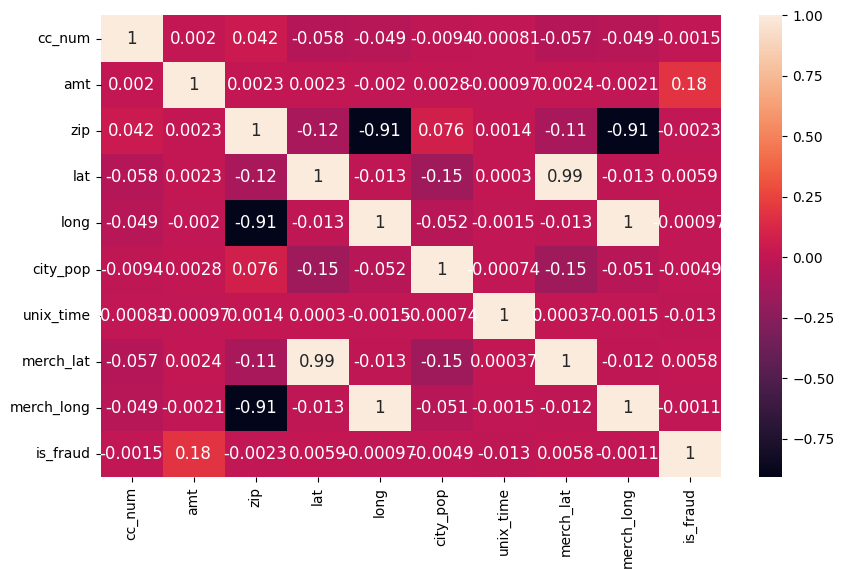

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(dt_fraud.corr(numeric_only=True),annot=True)
plt.show()

Analizando los coeficientes de correlación entre las variables y la variable objetivo `is_fraud`, se pueden hacer algunas observaciones importantes y reevaluar la necesidad de eliminar algunas columnas:

**Observaciones Clave de la Matriz de Correlación:**

1. **amt (Transaction Amount)**: Tiene una correlación moderada con `is_fraud` (0.182267), lo que indica que puede ser un predictor significativo de transacciones fraudulentas. Esto confirma que la cantidad de la transacción es un factor importante a considerar.
2. **lat (Latitude) y long (Longitude)**: Tienen correlaciones muy bajas con `is_fraud`, pero son casi perfectamente correlacionadas con `merch_lat` y `merch_long` respectivamente. Esto sugiere que `lat` y `long` podrían ser redundantes si ya se están utilizando las coordenadas del comerciante para el análisis.
3. **zip y city_pop**: Ambos tienen correlaciones muy bajas con `is_fraud`. Además, `zip` está altamente correlacionado negativamente con `long` y `merch_long`, lo que puede indicar redundancia.
4. **cc_num**: Tiene una correlación extremadamente baja con `is_fraud` y también muestra una correlación moderada con `zip`. Puede considerarse para eliminación debido a su baja relevancia predictiva y preocupaciones de privacidad.

In [ ]:
# Eliminar las columnas especificadas del DataFrame
dt_fraud.drop(columns=['merch_lat','merch_long', 'cc_num', 'first', 'last', 'street', 'dob', 'trans_num', 'zip', 'trans_date_trans_time'], inplace=True)

In [ ]:
dt_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   merchant   555719 non-null  object 
 1   category   555719 non-null  object 
 2   amt        555719 non-null  float64
 3   gender     555719 non-null  object 
 4   city       555719 non-null  object 
 5   state      555719 non-null  object 
 6   lat        555719 non-null  float64
 7   long       555719 non-null  float64
 8   city_pop   555719 non-null  int64  
 9   job        555719 non-null  object 
 10  unix_time  555719 non-null  int64  
 11  is_fraud   555719 non-null  int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 50.9+ MB


In [ ]:
dt_fraud.head()

merchant        category    amt gender  \
0                 fraud_Kirlin and Sons   personal_care   2.86      M   
1                  fraud_Sporer-Keebler   personal_care  29.84      F   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28      F   
3                     fraud_Haley Group        misc_pos  60.05      M   
4                 fraud_Johnston-Casper          travel   3.19      M   

         city state      lat      long  city_pop                     job  \
0    Columbia    SC  33.9659  -80.9355    333497     Mechanical engineer   
1     Altonah    UT  40.3207 -110.4360       302  Sales professional, IT   
2    Bellmore    NY  40.6729  -73.5365     34496       Librarian, public   
3  Titusville    FL  28.5697  -80.8191     54767            Set designer   
4    Falmouth    MI  44.2529  -85.0170      1126      Furniture designer   

    unix_time  is_fraud  
0  1371816865         0  
1  1371816873         0  
2  1371816893         0  
3  1371816915         0  
4  1371816917         0

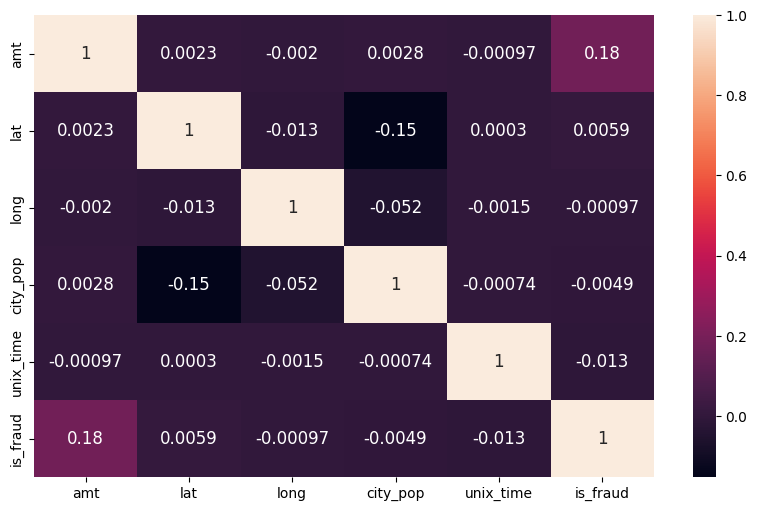

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(dt_fraud.corr(numeric_only=True),annot=True)
plt.show()

In [ ]:
# Verificar valores en columnas categóricas
cat_fraud = dt_fraud.select_dtypes(include=['object']).columns

for column in cat_fraud:
    unique_values = dt_fraud[column].unique()
    print(f"Valores en {column}:", unique_values)

Valores en merchant: ['fraud_Kirlin and Sons' 'fraud_Sporer-Keebler'
 'fraud_Swaniawski, Nitzsche and Welch' 'fraud_Haley Group'
 'fraud_Johnston-Casper' 'fraud_Daugherty LLC' 'fraud_Romaguera Ltd'
 'fraud_Reichel LLC' 'fraud_Goyette, Howell and Collier'
 'fraud_Kilback Group' 'fraud_Feil, Hilpert and Koss'
 'fraud_Gottlieb Group' 'fraud_Connelly-Carter' 'fraud_Bechtelar-Rippin'
 'fraud_Lubowitz-Walter' 'fraud_Welch, Rath and Koepp'
 'fraud_Hickle Group' 'fraud_Lang, Towne and Schuppe'
 'fraud_Morissette LLC' 'fraud_Prosacco LLC' 'fraud_Corwin-Romaguera'
 'fraud_Tillman LLC' 'fraud_Veum-Koelpin'
 'fraud_Watsica, Haag and Considine' 'fraud_Leannon-Ward'
 'fraud_Hintz, Bauch and Smith' 'fraud_Labadie LLC'
 'fraud_Eichmann, Hayes and Treutel' 'fraud_Leffler-Goldner'
 'fraud_Kautzer and Sons' 'fraud_Ernser-Feest'
 'fraud_Zemlak, Tillman and Cremin' 'fraud_Nienow PLC'
 'fraud_Lynch-Wisozk' 'fraud_Schiller Ltd' 'fraud_Hoppe-Parisian'
 'fraud_Brown-Greenholt' 'fraud_Reilly LLC'
 'fraud_Moore,

In [ ]:
dt_fraud.nunique()

merchant        693
category         14
amt           37256
gender            2
city            849
state            50
lat             910
long            910
city_pop        835
job             478
unix_time    544760
is_fraud          2
dtype: int64

No se enuentran valores fuera de los esperados en las columnas.

<ipython-input-66-c0d17c7036a1>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  category_count.set_xticklabels(category_count.get_xticklabels(), rotation=90)


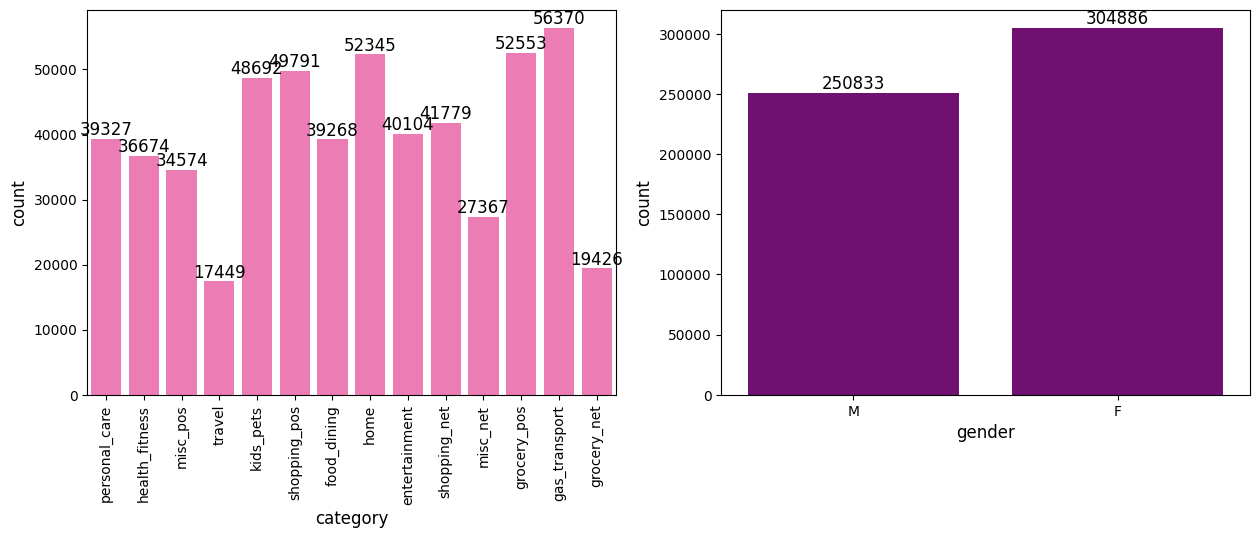

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Category count plot
category_count = sns.countplot(ax=axes[0], data=dt_fraud, x='category', color='hotpink')
category_count.set_xticklabels(category_count.get_xticklabels(), rotation=90)
for bars in category_count.containers:
    category_count.bar_label(bars)

# Gender counts plot
gender_count = sns.countplot(ax=axes[1], data=dt_fraud, x='gender', color='purple')
for bars in gender_count.containers:
    gender_count.bar_label(bars)

plt.show()

Basándonos en las gráficas proporcionadas:

1. **Distribución de Transacciones por Categoría**:
   - La primera gráfica muestra el conteo de transacciones distribuidas entre diferentes categorías.
   - Se observa que las categorías con más transacciones son 'grocery_pos', 'home', 'shopping_net', y 'misc_net', lo que sugiere que estas categorías son muy populares para las transacciones dentro del conjunto de datos.
   - Las categorías como 'travel', 'kids_pets', y 'entertainment' tienen menos transacciones, lo que podría indicar que son menos comunes o que la muestra de datos no abarca tantas transacciones en esas áreas.
   - El conteo alto en 'grocery_pos' puede ser explicado por la frecuencia de compras en tiendas de comestibles comparada con gastos más esporádicos como los viajes.
   - La categoría 'misc_net' también muestra un alto volumen de transacciones, lo cual puede indicar un área con variedad de productos o servicios comprados en línea.

2. **Distribución de Transacciones por Género**:
   - La segunda gráfica presenta el conteo de transacciones dividido entre los géneros 'M' (Masculino) y 'F' (Femenino).
   - Se puede ver que el número de transacciones atribuidas al género femenino es ligeramente superior al número de transacciones del género masculino.
   - Este patrón podría sugerir diferentes comportamientos de gasto entre los géneros dentro del conjunto de datos, o posiblemente una distribución desigual en la representación de género.

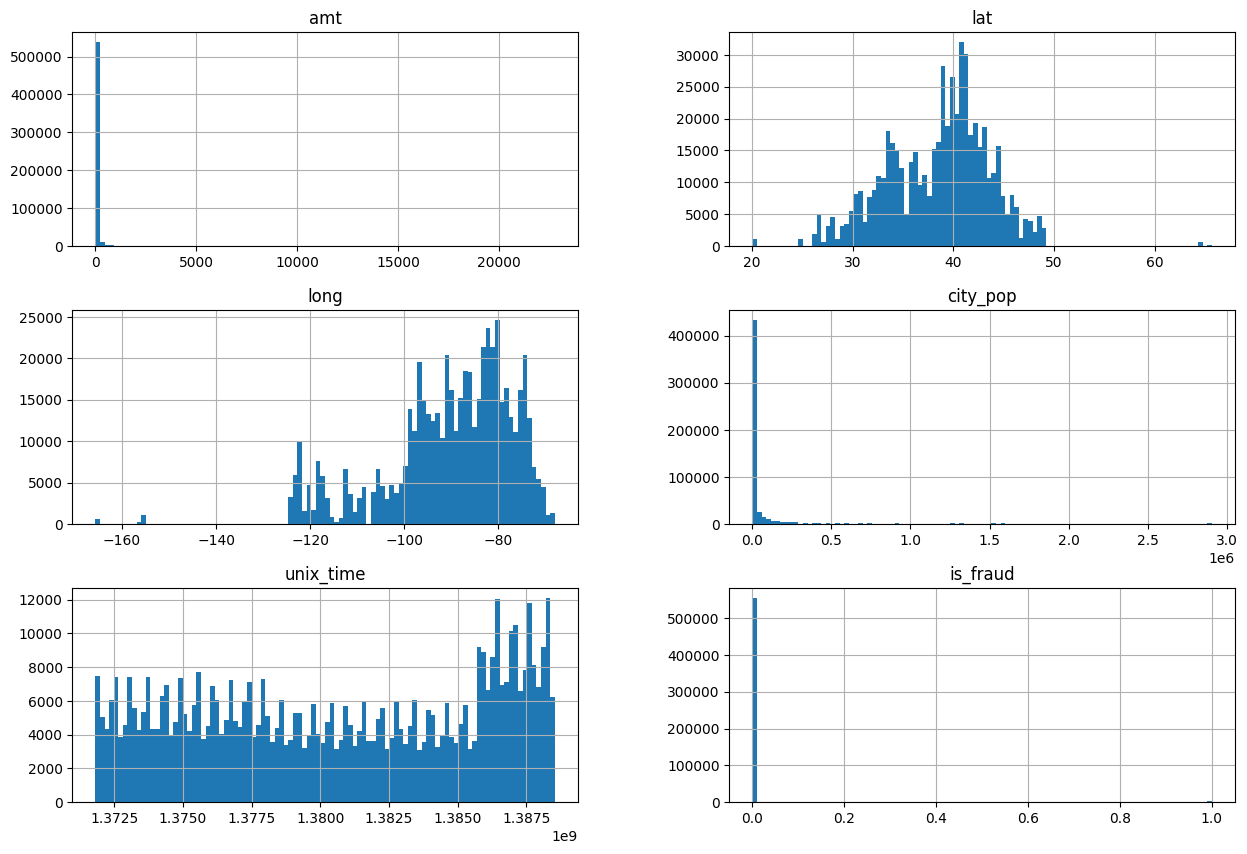

In [ ]:
dt_fraud.hist(bins = 100, figsize = (15, 10))
plt.show()

1. **Histograma de `amt` (Cantidad de la Transacción)**:
   - Este histograma muestra una distribución muy sesgada hacia la izquierda, con la mayoría de las transacciones teniendo montos pequeños. Hay unos pocos valores extremadamente altos que podrían representar grandes compras o transacciones atípicas que podrían necesitar un análisis adicional para ver si están asociados con fraude.

2. **Histograma de `long` (Longitud Geográfica), Histograma de `lat` (Latitud Geográfica**:
   - La longitud geográfica parece tener una distribución multimodal, con picos en ciertos rangos. Esto podría reflejar áreas geográficas específicas donde se realizan las transacciones con mayor frecuencia.
    
    Similar a la longitud, la latitud muestra una distribución multimodal. Los picos podrían representar agrupaciones de transacciones en varias latitudes específicas, lo que podría correlacionarse con la distribución geográfica de los consumidores o las zonas comerciales.

4. **Histograma de `city_pop` (Población de la Ciudad)**:
   - Esta variable también está muy sesgada hacia la izquierda, indicando que la mayoría de las transacciones ocurren en ciudades con poblaciones más pequeñas, con solo unas pocas transacciones en ciudades de gran población.

5. **Histograma de `unix_time`**:
   - La distribución del tiempo Unix de las transacciones muestra una cierta periodicidad, lo que podría reflejar patrones de compra en el tiempo.

6. **Histograma de `is_fraud` (Indicador de Fraude)**:
   - La variable `is_fraud` es binaria, mostrando la mayoría de los valores en 0 (transacciones legítimas) y muy pocos en 1 (transacciones fraudulentas). Esto es típico en conjuntos de datos de fraude, donde las transacciones fraudulentas son relativamente raras comparadas con las legítimas.


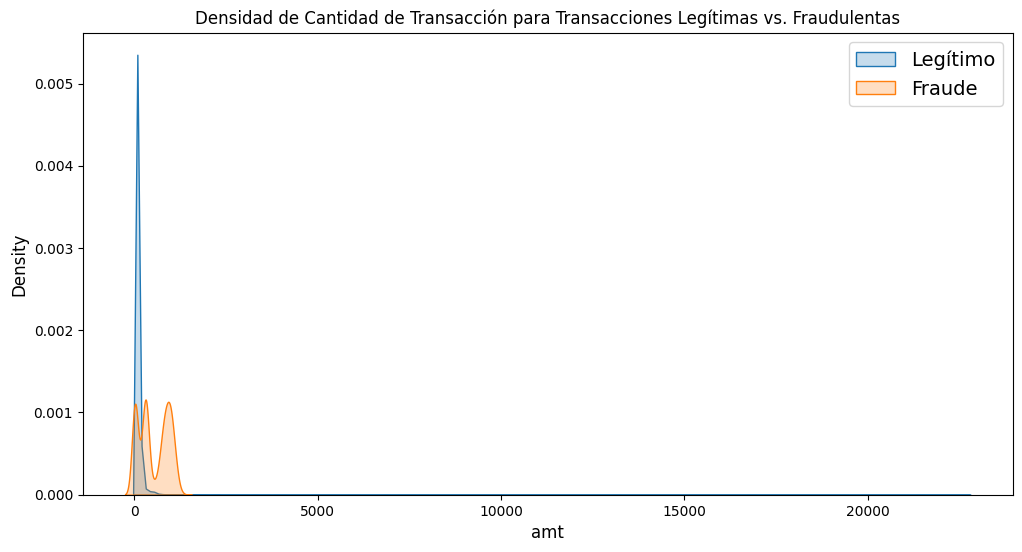

In [ ]:
# Gráfico de Densidad de Cantidad de Transacción versus Transacciones Fraudulentas
plt.figure(figsize=(12, 6))
sns.kdeplot(dt_fraud[dt_fraud['is_fraud'] == 0]['amt'], label='Legítimo', fill=True)
sns.kdeplot(dt_fraud[dt_fraud['is_fraud'] == 1]['amt'], label='Fraude', fill=True)
plt.title('Densidad de Cantidad de Transacción para Transacciones Legítimas vs. Fraudulentas')
plt.legend()
plt.show()

La gráfica muestra la distribución de la densidad de las cantidades de transacciones para casos etiquetados como legítimos y fraudulentos. Basándonos en la gráfica, podemos observar lo siguiente:

1. **Transacciones Legítimas (Color Azul)**:
   - Las transacciones legítimas tienen picos de densidad muy pronunciados cerca de cero, lo que indica que la mayoría de las transacciones legítimas son de montos bajos.
   - Hay muy pocas transacciones legítimas de montos elevados, como lo demuestra la rápida caída en la densidad a medida que el monto de la transacción aumenta.

2. **Transacciones Fraudulentas (Color Naranja)**:
   - Las transacciones fraudulentas también presentan picos cerca de montos bajos, pero hay presencia notable de transacciones con montos más altos, como lo indican los picos adicionales que están presentes en cantidades mayores que las más frecuentes en las transacciones legítimas.
   - La densidad de las transacciones fraudulentas tiende a ser más distribuida, lo que sugiere que el fraude ocurre en un rango más amplio de montos de transacción.

**Conclusiones:**

- **Patrones Distintos**: Existe un patrón diferenciado en el comportamiento de las transacciones legítimas frente a las fraudulentas en cuanto a la cantidad de dinero transaccionado. Las legítimas tienden a ser de menor monto y más consistentes, mientras que las fraudulentas son más variadas y presentan cantidades mayores.
- **Posible Umbral de Detección**: Puede existir un umbral de cantidad de transacción por encima del cual aumenta la probabilidad de que una transacción sea fraudulenta. Este umbral podría ser utilizado para establecer controles o alertas en un sistema de detección de fraude.
- **Análisis de Riesgo**: Las instituciones financieras pueden necesitar aplicar un escrutinio adicional a transacciones de ciertos rangos de monto que tienen una probabilidad más alta de ser fraudulentas según lo sugerido por los picos en la densidad de fraudes.

Además, la escala de la gráfica (particularmente en el eje x, que se extiende hasta 20000) podría estar distorsionando la visualización de la densidad en los montos más bajos, que es donde ocurre la mayoría de las transacciones. Sería beneficioso revisar la escala o realizar gráficos separados para rangos de montos para una mejor interpretación.

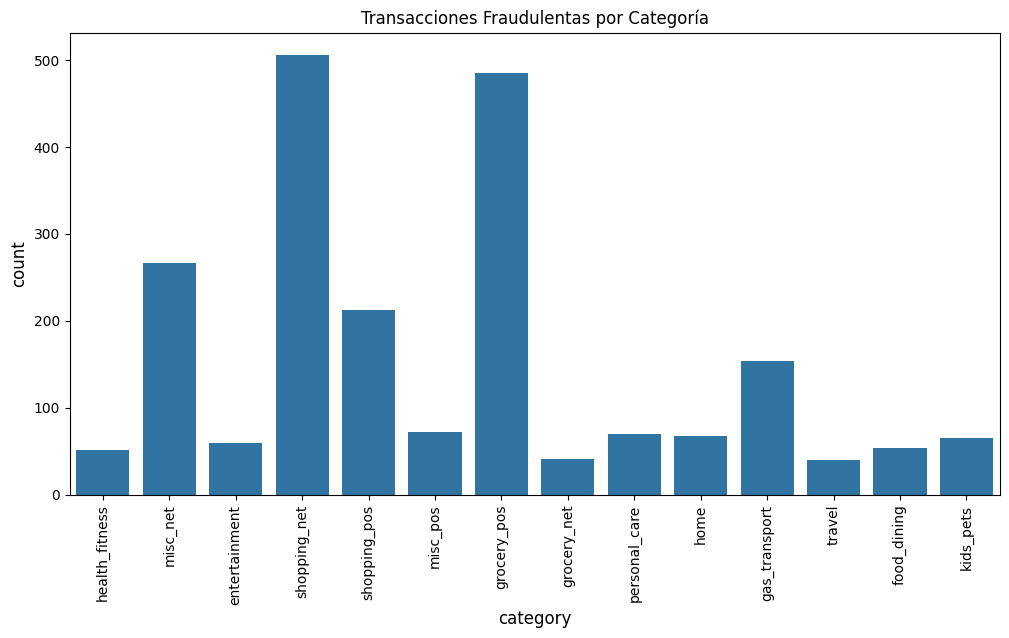

In [ ]:
# Gráfico de Barras de la Cantidad de Transacciones Fraudulentas por Categoría
fraud_transactions = dt_fraud[dt_fraud['is_fraud'] == 1]
plt.figure(figsize=(12, 6))
sns.countplot(x='category', data=fraud_transactions)
plt.xticks(rotation=90)
plt.title('Transacciones Fraudulentas por Categoría')
plt.show()

La gráfica de barras muestra el conteo de transacciones fraudulentas clasificadas por categoría. Según la gráfica, se pueden extraer las siguientes conclusiones:

1. **Categorías con Mayor Fraude**:
   - La categoría 'shopping_net' (compras por internet) tiene el mayor número de transacciones fraudulentas. Esto podría deberse a la naturaleza remota y a menudo anónima de las transacciones por internet.
   - 'grocery_pos' (comestibles punto de venta) también tiene una cantidad significativa de fraude. Aunque las transacciones en comestibles son comunes y numerosas, lo que podría explicar parcialmente la alta cifra, es posible que los defraudadores apunten a estos tipos de transacciones debido a la frecuencia y quizás menores medidas de seguridad en comparación con otras categorías.

2. **Categorías con Menor Fraude**:
   - Las categorías como 'kids_pets' (niños y mascotas), 'food_dining' (comida y restaurantes) y 'travel' (viajes) muestran un número relativamente bajo de transacciones fraudulentas en comparación con otras categorías.

3. **Impacto del Tipo de Transacción**:
   - La variación en la cantidad de fraude por categoría podría indicar diferentes niveles de riesgo según el tipo de transacción. Las diferencias podrían deberse a varios factores, incluyendo el tamaño de la transacción, la frecuencia y el tipo de bienes o servicios transaccionados.


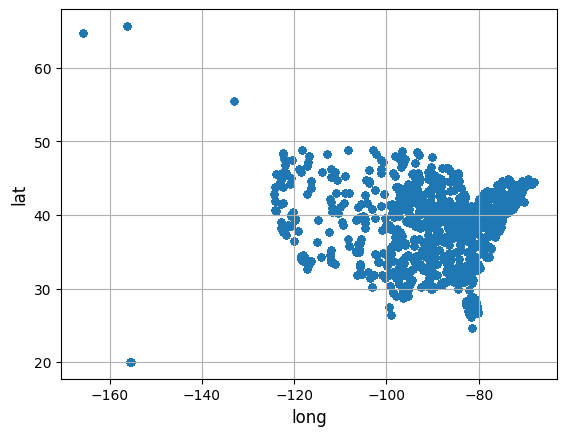

In [ ]:
dt_fraud.plot(kind = 'scatter', x = 'long', y = 'lat', grid = True)
plt.show()

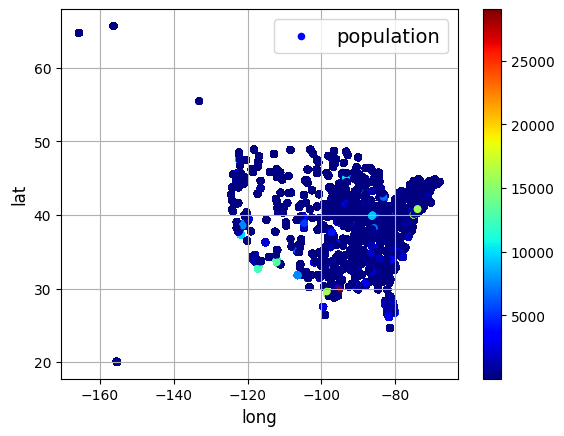

In [ ]:
dt_fraud.plot(kind = 'scatter', x = 'long', y = 'lat', grid = True, c = dt_fraud['city_pop']/100, label = 'population', cmap = 'jet', colorbar = True)
plt.show()

La mayoría de los puntos están agrupados en un rango de longitud y latitud que podría corresponder a una región geográfica específica, como Estados Unidos. Esto sugiere una concentración de transacciones en estas áreas.


Como se sugirió anteriormente, los datos no están estandarizados, lo cual puede ser una consideración importante al aplicar ciertos algoritmos de aprendizaje automático que asumen que todas las características numéricas están en la misma escala, como la regresión logística, las máquinas de vectores de soporte (SVM) y los algoritmos basados en gradientes. La falta de estandarización puede llevar a que características con rangos más grandes dominen el proceso de aprendizaje, lo que podría resultar en un rendimiento subóptimo del modelo.

In [ ]:
num_f = dt_fraud.select_dtypes(include=['int64', 'float64'])
num_f = num_f.drop('is_fraud', axis=1, errors='ignore')

scaler = StandardScaler()
scaled_features = scaler.fit_transform(num_f)

df_scaled = pd.DataFrame(scaled_features, columns=num_f.columns)

Se decidió usar Ordinal Encoder debido a la Eficiencia Computacional:
OrdinalEncoder transforma las características categóricas en números enteros, lo cual es computacionalmente eficiente. Esto puede ser preferible sobre técnicas como el 'one-hot encoding' en casos donde hay un gran número de categorías, como es este caso.

In [ ]:
ordinal_encoder = OrdinalEncoder()

cat_f = dt_fraud.select_dtypes(include=['object']).columns
encoded_features = ordinal_encoder.fit_transform(dt_fraud[cat_f])
dt_fraud_encoded = pd.DataFrame(encoded_features, columns=cat_f)

In [ ]:
df_scaled.index = dt_fraud.index
dt_fraud_encoded.index = dt_fraud.index

dt_fraud2 = pd.concat([df_scaled, dt_fraud_encoded], axis=1)
dt_fraud2['is_fraud'] = dt_fraud['is_fraud']

dt_fraud2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   amt        555719 non-null  float64
 1   lat        555719 non-null  float64
 2   long       555719 non-null  float64
 3   city_pop   555719 non-null  float64
 4   unix_time  555719 non-null  float64
 5   merchant   555719 non-null  float64
 6   category   555719 non-null  float64
 7   gender     555719 non-null  float64
 8   city       555719 non-null  float64
 9   state      555719 non-null  float64
 10  job        555719 non-null  float64
 11  is_fraud   555719 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 50.9 MB


In [ ]:
# Se eliminan las filas duplicadas en caso de que hallan
duplicate_rows = dt_fraud2[dt_fraud2.duplicated()]
dt_fraud2 = dt_fraud2.drop_duplicates()
print("cantidad de filas duplicadas: ",len(duplicate_rows))

cantidad de filas duplicadas:  0


In [ ]:
corr_matrix = dt_fraud2.corr(numeric_only=True)
corr_matrix

amt       lat      long  city_pop  unix_time  merchant  \
amt        1.000000  0.002339 -0.002046  0.002760  -0.000974 -0.003780   
lat        0.002339  1.000000 -0.012892 -0.152666   0.000301  0.000455   
long      -0.002046 -0.012892  1.000000 -0.051524  -0.001460  0.000466   
city_pop   0.002760 -0.152666 -0.051524  1.000000  -0.000740 -0.000194   
unix_time -0.000974  0.000301 -0.001460 -0.000740   1.000000 -0.001017   
merchant  -0.003780  0.000455  0.000466 -0.000194  -0.001017  1.000000   
category   0.026811 -0.008215 -0.002902  0.009164   0.001097  0.028033   
gender     0.000027  0.042692  0.051235 -0.029367  -0.000577 -0.002018   
city       0.000576 -0.029359 -0.068117  0.034884  -0.001784 -0.001737   
state     -0.002561  0.213116  0.126008 -0.011885  -0.000031  0.000106   
job       -0.004848 -0.025205 -0.001133 -0.053170   0.000699 -0.000713   
is_fraud   0.182267  0.005863 -0.000972 -0.004910  -0.013066 -0.000086   

           category    gender      city     state       job  is_fraud  
amt        0.026811  0.000027  0.000576 -0.002561 -0.004848  0.182267  
lat       -0.008215  0.042692 -0.029359  0.213116 -0.025205  0.005863  
long      -0.002902  0.051235 -0.068117  0.126008 -0.001133 -0.000972  
city_pop   0.009164 -0.029367  0.034884 -0.011885 -0.053170 -0.004910  
unix_time  0.001097 -0.000577 -0.001784 -0.000031  0.000699 -0.013066  
merchant   0.028033 -0.002018 -0.001737  0.000106 -0.000713 -0.000086  
category   1.000000 -0.027684 -0.001949  0.000169  0.001794  0.016980  
gender    -0.027684  1.000000  0.016914 -0.030149 -0.079028  0.000748  
city      -0.001949  0.016914  1.000000 -0.041665  0.023220  0.001777  
state      0.000169 -0.030149 -0.041665  1.000000  0.043313 -0.006075  
job        0.001794 -0.079028  0.023220  0.043313  1.000000 -0.005074  
is_fraud   0.016980  0.000748  0.001777 -0.006075 -0.005074  1.000000

In [ ]:
corr_matrix['is_fraud'].sort_values(ascending = False)

is_fraud     1.000000
amt          0.182267
category     0.016980
lat          0.005863
city         0.001777
gender       0.000748
merchant    -0.000086
long        -0.000972
city_pop    -0.004910
job         -0.005074
state       -0.006075
unix_time   -0.013066
Name: is_fraud, dtype: float64

Aquí están las conclusiones que se pueden sacar de tu matriz de correlación:

1. **`amt` (Monto de la Transacción)**: Con una correlación de 0.182267, es la variable más fuertemente correlacionada positivamente con `is_fraud`. Esto significa que a medida que el monto de la transacción aumenta, también lo hace la probabilidad de que sea fraudulenta, aunque la relación no es extremadamente fuerte.

2. **`category`**: Tiene una correlación positiva muy baja con `is_fraud` (0.016980), lo que sugiere que podría haber una ligera tendencia de ciertas categorías a estar más asociadas con el fraude que otras.

3. **`lat` (Latitud)** y **`city`**: Tienen correlaciones positivas muy bajas con `is_fraud`. Esto podría indicar que hay una relación muy leve entre la ubicación geográfica de la transacción y la ocurrencia de fraude.

4. **`gender`**: Casi no muestra correlación con `is_fraud`, sugiriendo que el género del titular de la tarjeta no es un indicador de fraude.

5. **`merchant`, `long` (Longitud)** y **`city_pop` (Población de la Ciudad)**: Tienen correlaciones negativas muy bajas con `is_fraud`. La correlación negativa entre `city_pop` y `is_fraud` podría sugerir que las transacciones en ciudades con poblaciones más grandes tienen una leve tendencia a ser menos propensas al fraude.

6. **`job`** y **`state`**: Tienen una leve correlación negativa con `is_fraud`. Esto podría sugerir que ciertos trabajos o estados están levemente menos asociados con transacciones fraudulentas.

7. **`unix_time`**: La correlación negativa con `is_fraud` indica que las transacciones más recientes (con un mayor tiempo Unix) tienden levemente a ser menos propensas a ser fraudulentas.

**Implicaciones para el Modelado y Estrategias de Prevención de Fraude:**

- **Montos Altos como Indicadores de Fraude**: Dada la correlación moderada entre `amt` y `is_fraud`, los sistemas de detección de fraude podrían beneficiarse de reglas o modelos que asignen un nivel de riesgo más alto a transacciones con montos más grandes.
- **Relevancia de la Categoría**: Aunque la correlación con `category` es baja, esta podría ser importante en conjunto con otras variables. Un análisis más detallado podría revelar ciertas categorías como más propensas al fraude.
- **Factores Demográficos y Temporales**: Las correlaciones muy bajas con variables como `lat`, `city`, `job`, `state` y `unix_time` sugieren que estos factores por sí solos no son fuertes indicadores de fraude, pero podrían contribuir al poder predictivo en combinación con otras variables y en modelos más complejos que puedan capturar interacciones no lineales entre variables.


array([[<Axes: title={'center': 'amt'}>, <Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>],
       [<Axes: title={'center': 'city_pop'}>,
        <Axes: title={'center': 'unix_time'}>,
        <Axes: title={'center': 'merchant'}>],
       [<Axes: title={'center': 'category'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'city'}>],
       [<Axes: title={'center': 'state'}>,
        <Axes: title={'center': 'job'}>,
        <Axes: title={'center': 'is_fraud'}>]], dtype=object)

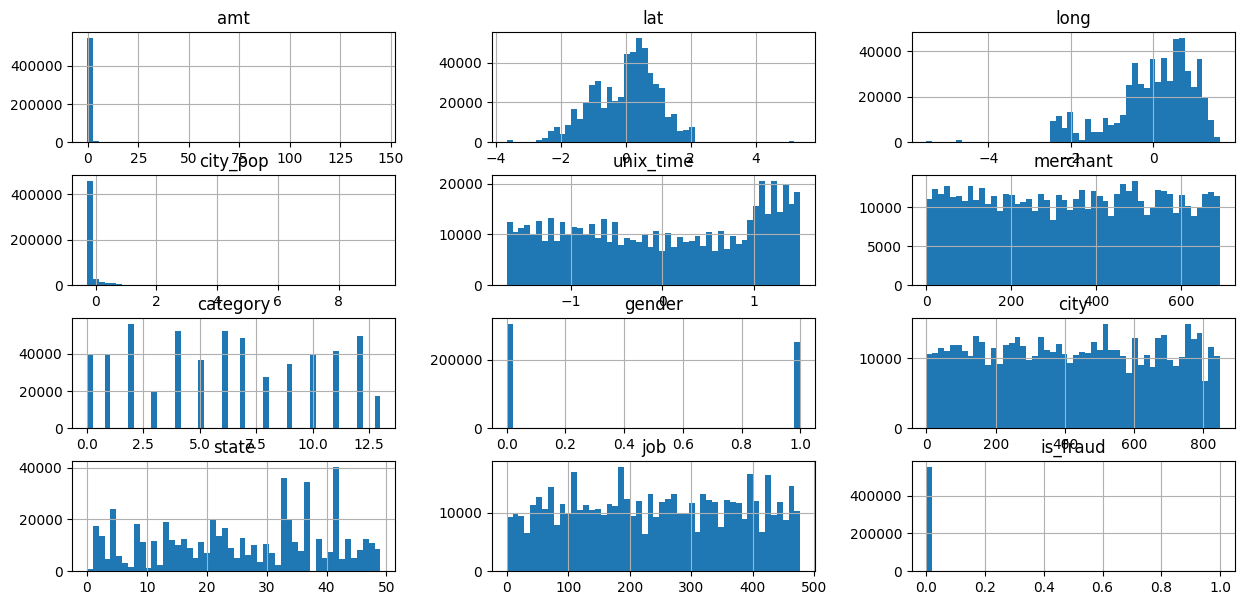

In [ ]:
dt_fraud2.hist(bins = 50, figsize=(15,7))

In [ ]:
def shuffle_and_split(data, test_ratio):
    shuffle_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffle_indices[:test_set_size]
    train_indices = shuffle_indices[test_set_size:]

    return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
fraud_train, fraud_test = shuffle_and_split(dt_fraud2, 0.3)

In [ ]:
y_train = fraud_train['is_fraud']
X_train = fraud_train.drop('is_fraud', axis=1)

y_test = fraud_test['is_fraud']
X_test = fraud_test.drop('is_fraud', axis=1)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)
print("Predicciones:\n", predictions)

Predicciones:
 [-0.00122008  0.00575511 -0.00159823 ...  0.00028427  0.00153703
 -0.00149916]


In [ ]:
mse = mean_squared_error(y_test, predictions)
print("Error cuadrático medio en el conjunto de prueba:", mse)

Error cuadrático medio en el conjunto de prueba: 0.0036788511900604478


Aquí están las conclusiones y consideraciones:

1. **Magnitud del MSE**:El MSE es una medida de la calidad de un estimador y es siempre no negativo. Los valores más pequeños de MSE indican un mejor ajuste entre las predicciones y los valores reales. En este caso, un MSE de 0.00375 es un valor bajo, lo que en este caso es bueno, ya que significa que el modelo está funncionando correctamente.

2. **Regresión Lineal en Clasificación**: La regresión lineal no es el enfoque estándar para la clasificación binaria, ya que no está diseñada para producir salidas binarias. Los modelos de clasificación como la regresión logística, que están diseñados para producir probabilidades de pertenencia a clases y tienen en cuenta la naturaleza de la distribución de la variable objetivo, son generalmente preferidos.

En resumen, aunque se ha aplicado la regresión lineal y obtenido un MSE para el conjunto de prueba, sería recomendable considerar métodos de clasificación apropiados que estén alineados con la naturaleza del problema de detección de fraude. Esto no solo te proporcionará métricas de rendimiento más relevantes, sino que también mejorará la capacidad de tu modelo para identificar correctamente las transacciones fraudulentas.

#TITANIC



---






In [ ]:
load_data('https://raw.githubusercontent.com/ChiaraUsa/datasets/main/Titanic%20Dataset.csv', 'titanic.csv')
titanic = pd.read_csv('/content/datasets/titanic.csv')

In [ ]:
titanic.shape

(1309, 14)

Se extrae el tamaño del dataset. Cuenta con **1309** filas, representado entradas individuales de cada pasajero. Tiene **14** columnas, representando características de cada instancia.

In [ ]:
print(titanic.columns.values)

['pclass' 'survived' 'name' 'sex' 'age' 'sibsp' 'parch' 'ticket' 'fare'
 'cabin' 'embarked' 'boat' 'body' 'home.dest']




* **survived**: Indica si el pasajero sobrevivió (1) o no (0). Variable objetivo.
* **pclass**:  Clase o categoria dentro del barco. Úbicación.
* **name**: Nombre del pasajero.
* **sex**: Sexo del pasajero.
* **age**: Edad del pasajero en años (puede contener valores faltantes).
* **sibsp**: Número de hermanos/cónyuges a bordo del Titanic.
* **parch**:  Número de padres/hijos a bordo del Titanic.
* **ticket**: Número de billete.
* **fare**: Tarifa de pasajero.
* **cabin**: Número de cabina (puede contener valores omitidos).
* **embarked**: Puerto de embarque (Southampton, Cherbourg, Queenstown).
* **boat**: Bote salvavidas al que fue asignado el pasajero (posiblemente falten valores para los pasajeros que no sobrevivieron).
* **body**: El número de cadáver si se ha recuperado al pasajero (en caso contrario, falta).
* **home.dest**: Lugar de partida y llegada (puede contener valores omitidos, categorico)



Con estas descripciones se intuye que la variable de interes es **survived** y comparar qué otras caraterísticas influyen en la supervivencia de los pasajeros abordo del barco. Por lo pronto lo más lógico es pensar que **sex** y **pclass** pueden tener una alta relación con la supervivencia.

In [ ]:
titanic.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.00      0      0   24160  211.3375       B5        S    2    NaN   
1   0.92      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.00      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

Se muestra las primeras 5 instancias del conjunto de datos para observar su naturaleza. Desde aquí ya se visualiza que características como **boat** o **body** tienen valores nulos o faltantes por lo que deben ser tratados.

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


Tipos de datos:

  * datos categóricos (como 'pclass', 'sex', 'embarked') se almacenan como objetos (text).

  * datos numéricos (como "edad", "tarifa") se almacenan como números enteros (int64) o números de coma flotante (float64).
  
  *La columna "edad" es la que tiene más valores perdidos (1046 no nulos de 1309).

Otras columnas como "cabin", "boat", "body" y "home.dest" también tienen datos perdidos.

In [ ]:
titanic.describe()

pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881138     0.498854     0.385027   
std       0.837836     0.486055    14.413493     1.041658     0.865560   
min       1.000000     0.000000     0.170000     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000

Descripción de las variables categoricas.

In [ ]:
titanic.describe(include=['O'])

name   sex    ticket        cabin embarked boat  \
count                   1309  1309      1309          295     1307  486   
unique                  1307     2       929          186        3   27   
top     Connolly, Miss. Kate  male  CA. 2343  C23 C25 C27        S   13   
freq                       2   843        11            6      914   39   

           home.dest  
count            745  
unique           369  
top     New York, NY  
freq              64

* Con el recuento de instancias se observa que **cabin** tiene bastantes valores faltantes teniendo solamente 295 de 1309.
* **name** tiene bastantes valores únicos, seguramente al pertenecer a cada individuo. Mientras que otras caraterisiticas como **sex** solo tiene 2.
* La mayor parte de los pasajero eran hombres. El puerto de mayor embarque es S - Southampton



---



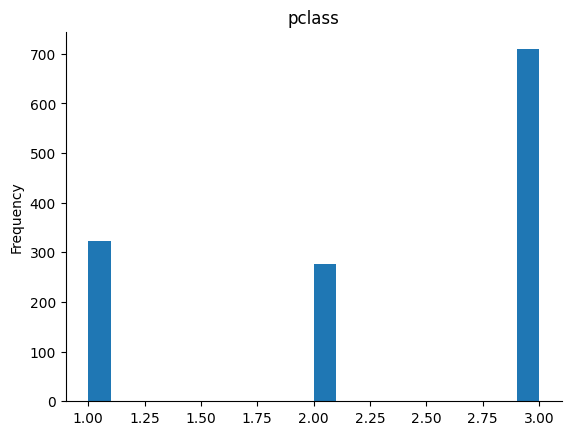

In [ ]:
# @title pclass

titanic['pclass'].plot(kind='hist', bins=20, title='pclass')
plt.gca().spines[['top', 'right',]].set_visible(False)

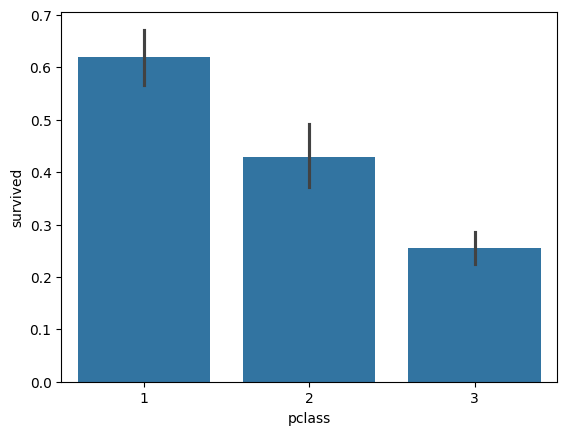

In [ ]:
# @title Survival Rate by Passenger Class

sns.barplot(x="pclass", y="survived", data=titanic)
plt.show()

* La mayor parte de los pasajeros pertenecían a tercera clase.
* Sin embargo la clase de pasajeros que más tuvo supervivencia fue la primera clase, la categoría de mayor valor donde se asume iban los adinerados.


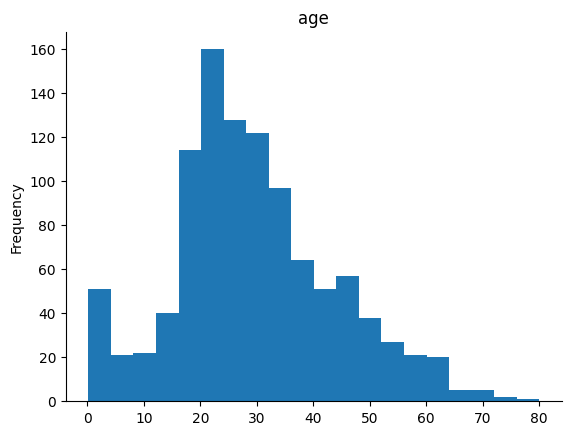

In [ ]:
# @title age

titanic['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

* Distribución casi normal en cuanto a la edad de los pasajeros.

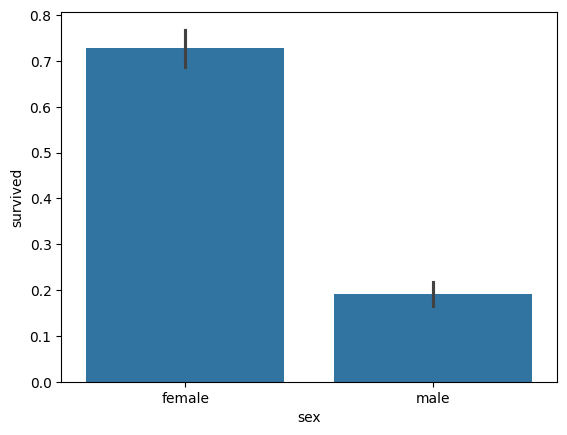

In [ ]:
# @title Survival rate by gender

sns.barplot(x="sex", y="survived", data=titanic)
plt.show()

* Las mujeres fue el sexo que más sobrevivió.

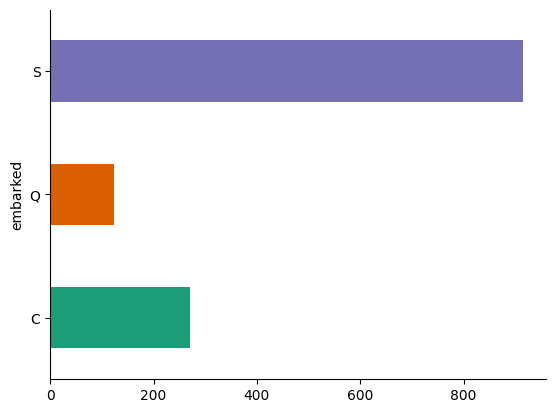

In [ ]:
# @title embarked

titanic.groupby('embarked').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

* Confirmando el puerto donde la mayoría de pasajeros embarcaron fue Southampton.

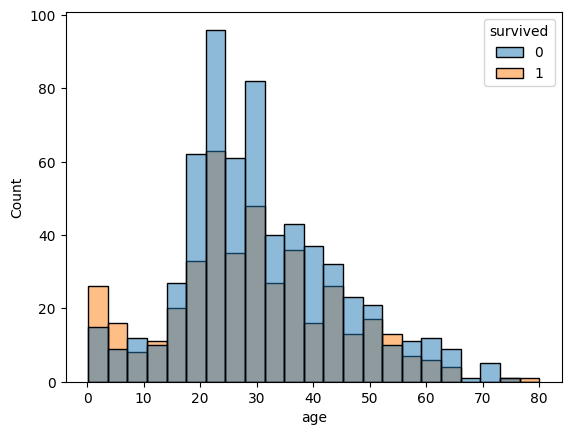

In [ ]:
# @title Survival Rate by Age

sns.histplot(x = 'age', hue = 'survived', data = titanic);

* Teniendo en cuenta las normas de evacuación donde los ancianos y niños son los primero en salir, se ve reflejado en el gráfico que, efectivamente el ratio de mayor supervivencia se encuentra en edades muy avanzadas y en las edades más tempranas. Dejando así la mayor parte de fallecidos en la parte central donde se encuentra la mayoría de adultos jovenes y de edad media.



---



In [ ]:
titanic[['pclass', 'survived']].groupby(['pclass'], as_index=False).mean().sort_values(by='survived', ascending=False)

pclass  survived
0       1  0.619195
1       2  0.429603
2       3  0.255289

In [ ]:
titanic[["sex", "survived"]].groupby(['sex'], as_index=False).mean().sort_values(by='survived', ascending=False)

sex  survived
0  female  0.727468
1    male  0.190985

In [ ]:
titanic[["sibsp", "survived"]].groupby(['sibsp'], as_index=False).mean().sort_values(by='survived', ascending=False)

sibsp  survived
1      1  0.510972
2      2  0.452381
0      0  0.346801
3      3  0.300000
4      4  0.136364
5      5  0.000000
6      8  0.000000



---



* Se verifica qué categorias tienen valores nulos.

In [ ]:
print(titanic.isnull().sum())

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


In [ ]:
titanic_2 = titanic.copy()

In [ ]:
# Imputar valores faltantes para la columna 'Age' con la mediana
median_age = titanic_2['age'].median()
titanic_2['age'].fillna(median_age, inplace=True)

In [ ]:
# Imputar valores faltantes para la columna 'Embarked' con la moda
mode_embarked = titanic_2['embarked'].mode()[0]
titanic_2['embarked'].fillna(mode_embarked, inplace=True)

In [ ]:
# Interpolar valores faltantes en la columna 'fare'
titanic_2['fare'] = titanic_2['fare'].interpolate()

In [ ]:
# Crear nuevas caracteristicas
titanic_2['familysize'] = titanic_2['sibsp'] + titanic_2['parch'] + 1

In [ ]:
# Mapear 'female' a 0 y 'male' a 1 en la columna 'sex'
titanic_2['sex'] = titanic_2['sex'].map({'female': 0, 'male': 1})

In [ ]:
# Aplicar codificación one-hot a la característica 'embarked'
embarked_encoded = pd.get_dummies(titanic_2['embarked'], prefix='embarked')

# Concatenar las nuevas columnas codificadas con el DataFrame original
titanic_2 = pd.concat([titanic_2, embarked_encoded], axis=1)

# Eliminar la columna original 'embarked'
titanic_2.drop('embarked', axis=1, inplace=True)


In [ ]:
# Remover
titanic_2.drop(['name', 'ticket', 'cabin', 'sibsp', 'parch', 'boat', 'body', 'home.dest'], axis=1,
          inplace=True)

In [ ]:
print(titanic_2.isnull().sum())

pclass        0
survived      0
sex           0
age           0
fare          0
familysize    0
embarked_C    0
embarked_Q    0
embarked_S    0
dtype: int64




---



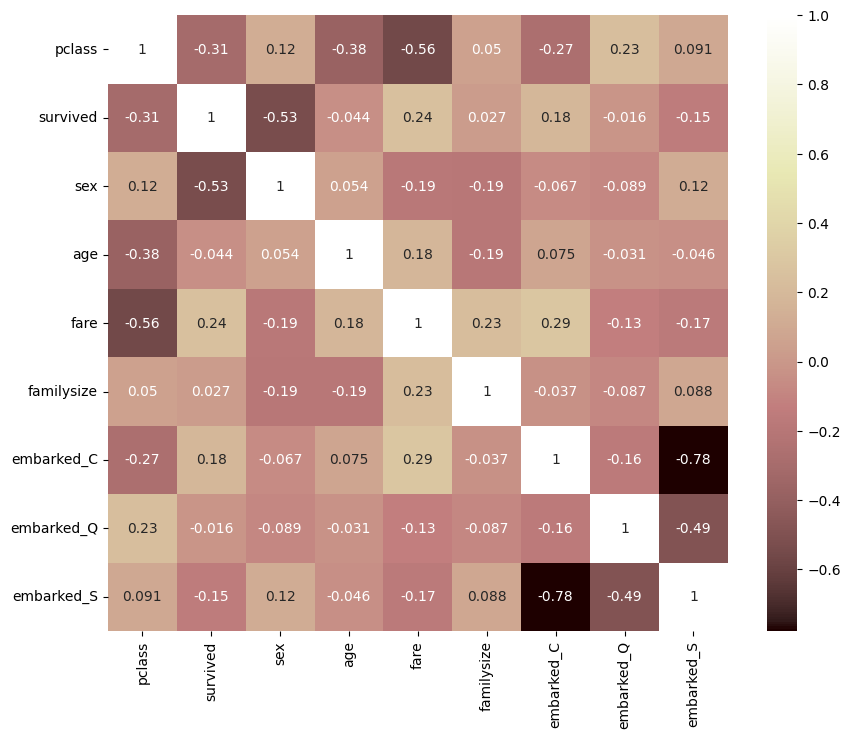

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(titanic_2.corr(), annot=True, cmap='pink')
plt.show()

In [ ]:
# Seleccionar solo las columnas de las características y la variable objetivo
features = titanic_2.drop('survived', axis=1)  # Remover la columna 'survived'
target = titanic_2['survived']  # Seleccionar la columna 'survived'

# Calcular la correlación entre las características y la variable objetivo
correlation_with_survived = features.corrwith(target)

# Mostrar la tabla de correlación
print(correlation_with_survived)


pclass       -0.312469
sex          -0.528693
age          -0.043817
fare          0.244479
familysize    0.026876
embarked_C    0.182123
embarked_Q   -0.016071
embarked_S   -0.150542
dtype: float64




---



* Clase pasajero (pclass): Hay una correlación negativa moderada (-0.31) entre la clase del pasajero y la probabilidad de sobrevivir. Esto indica que los pasajeros en clases más altas (clase 1) tenían más probabilidades de sobrevivir que aquellos en clases más bajas (clases 2 y 3).
* Sexo  pasajero (sex): Existe una correlación negativa fuerte (-0.53) entre el sexo del pasajero y la probabilidad de sobrevivir. Esto sugiere que las mujeres tenían significativamente más probabilidades de sobrevivir que los hombres.
* Edad del pasajero (age): La correlación con la edad es cercana a cero (-0.04), lo que indica una correlación débil entre la edad y la probabilidad de sobrevivir. Esto sugiere que la edad del pasajero no tuvo un efecto significativo en sus posibilidades de sobrevivir.
* Tarifa pagada (fare): Hay una correlación positiva moderada (0.24) entre la tarifa pagada y la probabilidad de sobrevivir. Esto sugiere que los pasajeros que pagaron tarifas más altas tenían más probabilidades de sobrevivir.
* Tamaño de la familia (familysize): La correlación con el tamaño de la familia es cercana a cero (0.03), lo que sugiere que el tamaño de la familia no tuvo un impacto significativo en las posibilidades de sobrevivir.
* Puerto de embarque (embarked): Hay correlaciones débiles positivas (0.18 para 'embarked_C') y negativas (-0.15 para 'embarked_S') con los puertos de embarque. Esto podría indicar alguna influencia, pero no es tan fuerte como otras características como la clase o el sexo.




---



In [ ]:
X = titanic_2[['pclass', 'sex', 'age', 'fare', 'familysize', 'embarked_C', 'embarked_Q', 'embarked_S']]
y = titanic_2['survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Escalar las características para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predecir la variable objetivo en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
predictions = model.predict(X_test)
print("Predicciones:\n", predictions)

Predicciones:
 [ 0.05376786  0.17350274  0.08784088  0.08788489  0.09713622  0.29261371
  0.10235767  0.21562109  0.06572383  0.84144005 -0.13579133  0.13650784
  0.7326969   0.08784088  0.06366012  0.604475    0.18062956  0.6048401
  0.87569788  0.02876357  0.62475066  0.34449803  0.12168208  0.34090033
  0.20964528  0.73389769  0.1527511   0.61185967  0.62381961  0.86429628
  0.31336123  0.31448447  0.56065291  0.77603819  0.30059152  0.08829866
  0.84196217  0.19144032  0.88985688  0.4681413   0.71812371  0.13141026
  0.66976218  0.0494868   0.14625165  0.08774221  0.06653597  0.64358519
  0.74159108  0.62415497  0.94308062  0.08788489  0.25988781  0.76895305
  0.12653844  0.27294152  0.14758728  0.54361742  0.07816858  0.5926715
  0.18151451  0.19360014  0.96758478  0.27294152  0.85888353  0.9647901
  0.83458339  0.02629772  0.13201545  0.14584025  0.4155084   0.27806304
  0.13136626  0.09230007  0.30442902  0.1072295   0.08784088  0.73975121
  0.2145528   0.79525174  0.10717362  0

In [ ]:
mse = mean_squared_error(y_test, predictions)
print("Error cuadrático medio en el conjunto de prueba:", mse)

Error cuadrático medio en el conjunto de prueba: 0.1605951069563588




---



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7786259541984732


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.88      0.81       144
           1       0.82      0.65      0.73       118

    accuracy                           0.78       262
   macro avg       0.79      0.77      0.77       262
weighted avg       0.78      0.78      0.77       262



In [ ]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[127  17]
 [ 41  77]]




---



* Para el caso del modelo linear se tuvo un error de 0.16, más alto de lo esperado pero sigue siendo un modelo funcional, teniendo en cuenta que no es el mejor modelo para clasificar. El no obtener un erro aún más bajo puede deberse a la gran cantidad de carterísticas categoricas que no aportaban mucho a la predicción y quedando solo con las más cómunes y más complejas de ajustar al modelo.
* Al relizar el experimento con la regresión logistica se obtiene una precisión del 0.8 clasificando de mejor manera que el anterior modelo gracias a la naturaleza del mismo.
